In [1]:
import pandas as pd
import numpy as np
# import spotipy
# import SpotipyWrapper
# import Visualization


In [4]:
help(SpotipyWrapper)

Help on module SpotipyWrapper:

NAME
    SpotipyWrapper

CLASSES
    builtins.object
        WrapperClass
    
    class WrapperClass(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(self)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  doAuth(self)
     |      Funtion: Setup and initialization of credentials manager and 
     |      master Spotify object
     |      
     |      Returns: Spotify Object
     |  
     |  findGenre(self, names)
     |  
     |  getFeatures(self, songsDF)
     |  
     |  getName(self, results, nameArr)
     |  
     |  getPlaylistGenre(self, songsDF)
     |  
     |  getSongsFromPlaylist(self, uri, username, name='')
     |      Function: Get list of songs from certain playlist
     |      
     |      Returns: Dataframe containing [song name, uri]
     |  
     |  getUsersPlaylists(self, username='mikeydays')
     |      Function: Get a list of users playlist names
     |      
     |  

In [5]:
wrapper = SpotipyWrapper.WrapperClass()
sp = wrapper.doAuth()

In [6]:

playlistDF = wrapper.getUsersPlaylists('mikeydays')
playlistDF


,name,uri
0,wholesome bangers,52Z4shkqqeHL1AzX1NUgzY
1,Throwback Dingers,6v3WpQVrQbgfpU2EVxm3eW
2,eminem,2Zfrz2ddkRw64NSG3nRsf3
3,not country,3EaIcfySntnbcOWrBAnb96
4,country,0ZB9jG1uyCbs4rnQ1V5ro6


In [7]:
artistsDF = pd.read_csv('artist-uris.csv')
artistsDF.columns=['name', 'uri']
artistsDF['uri'] = artistsDF['uri'].apply(lambda uri: uri.split(':')[2])

artistsDF

,name,uri
0,2:00 AM,4tN3rZ7cChj4Wns2Wt2Nj6
1,2:15,4HsOm6VNKZtGh8W8GhdNu4
2,2:54,3LsQKoRgMc8VEkQn66jfAQ
3,4:20,5KCG0FDMDPzQpxcohGUnyH
4,6:30,5abblGojcZoe3zZBhJFBUi
...,...,...
81317,黃曉明,53F8atvCmVFVOvnKwZXBd3
81318,黃玠瑋,6VI0p0xTjBKKxQN8i8vGpD
81319,黃義達,7kaq0LysuRSgBZSorlZ7Vj
81320,黃顯忠 (Huang Xianzhong),7MuuEryyseo5cvReO6gdPF


In [28]:
uri = playlistDF[playlistDF['name'] == 'country']['uri'].values[0]

countryDF = wrapper.getSongsFromPlaylist(uri, 'mikeydays')
countryDF['playlist'] = 'country'
countryDF

,name,uri,genres,artist,playlist
0,I Love This Life,5d0iu7Mc64GwJIMBGjDt2U,"[contemporary country, country pop, country ra...",LOCASH,country
1,Sunday Morning,0BzIw053LdsgAu8Sb1baIn,"[contemporary country, country, country pop, c...",Parmalee,country
2,Sun Daze,0El2Zyt68nYySFDG87hZgM,"[dance pop, hip hop, pop rap, rap, southern hi...",Florida Georgia Line,country
3,"Courtesy Of The Red, White And Blue (The Angry...",0M7mWKqwTIaVjYyxfZmtTa,"[contemporary country, country, country road, ...",Toby Keith,country
4,Loving You Easy,4ieqNz8S9pvnA0inetRkE3,"[contemporary country, country, country road, ...",Zac Brown Band,country
...,...,...,...,...,...
390,Whiskey Lullaby (feat. Alison Krauss),6iblnklMzUKIXAtjk5lzIy,"[contemporary country, country, country road]",Brad Paisley,country
391,Texas Was You,3XmGUn730lnJnYMUAMhlHk,"[contemporary country, country, country road]",Jason Aldean,country
392,Fly Over States,17X2tSzibD9n9QRjdExcWT,"[contemporary country, country, country road]",Jason Aldean,country
393,Arkansas,1N7ZIHq3OefYm8ntDSxHZ0,"[contemporary country, outlaw country]",Chris Stapleton,country


In [29]:
# had to get the URI differently here becuase there is an emoji in the not country title
uri = playlistDF.iloc[3]['uri']

notCountryDF = wrapper.getSongsFromPlaylist(uri, 'mikeydays')
notCountryDF['playlist'] = 'not country'
notCountryDF

,name,uri,genres,artist,playlist
0,Go Legend (& Metro Boomin),3wAI7MIQtTgwcRmwchPZBc,"[detroit hip hop, hip hop, pop rap, rap, south...",Big Sean,not country
1,SAD!,3ee8Jmje8o58CHK66QrVC2,"[emo rap, miami hip hop]",XXXTENTACION,not country
2,Everybody Dies In Their Nightmares,3GVkPk8mqxz0itaAriG1L7,"[emo rap, miami hip hop]",XXXTENTACION,not country
3,KOD,7yotKA30dwTKNEGomV9ZsI,"[conscious hip hop, north carolina hip hop, rap]",J. Cole,not country
4,Kevin’s Heart,6tZ3b7ik1QDXFAZlXib0YZ,"[conscious hip hop, north carolina hip hop, rap]",J. Cole,not country
5,Mo Bamba,3QybPutx0Tjk472bBKjNWn,"[rap, trap, underground hip hop, vapor trap]",Sheck Wes,not country
6,Winning Streak,553j9aJ9x3Q4NtXNv8z0Ao,"[alternative r&b, escape room, indie r&b, unde...",Shaboozey,not country
7,Adam and Eve,0BSPhsCKfwENstErymcD80,"[dance pop, pop, post-teen pop]",Nas,not country
8,ATM,2UciqgwVDwro0fev3MFbxJ,"[conscious hip hop, north carolina hip hop, rap]",J. Cole,not country
9,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,"[rap, slap house]",Travis Scott,not country


In [30]:
uri = playlistDF[playlistDF['name'] == 'Throwback Dingers']['uri'].values[0]

throwbacksDF = wrapper.getSongsFromPlaylist(uri, 'mikeydays')
throwbacksDF['playlist'] = 'Throwback Dingers'
throwbacksDF

,name,uri,genres,artist,playlist
0,Time of Our Lives,2bJvI42r8EF3wxjOuDav4r,"[dance pop, latin, miami hip hop, pop, pop rap]",Pitbull,Throwback Dingers
1,Five More Hours - Deorro x Chris Brown,3MOECVkNshqHYTPt5DZcdN,"[dance pop, edm, electro house, melbourne boun...",Deorro,Throwback Dingers
2,Outside (feat. Ellie Goulding),7MmG8p0F9N3C4AXdK6o6Eb,"[dance pop, edm, electro house, house, pop, po...",Calvin Harris,Throwback Dingers
3,Let Me Love You (Until You Learn To Love Yours...,4kte3OcW800TPvOVgrLLj8,"[dance pop, latin, miami hip hop, pop, pop rap]",Ne-Yo,Throwback Dingers
4,Club Can't Handle Me (feat. David Guetta),6ebkx7Q5tTxrCxKq4GYj0Y,"[dance pop, miami hip hop, pop, pop rap]",Flo Rida,Throwback Dingers
...,...,...,...,...,...
62,Headlines,6LxSe8YmdPxy095Ux6znaQ,"[canadian hip hop, canadian pop, hip hop, pop ...",Drake,Throwback Dingers
63,Halo,4JehYebiI9JE8sR8MisGVb,"[dance pop, pop, post-teen pop, r&b]",Beyoncé,Throwback Dingers
64,Pon de Replay,4TsmezEQVSZNNPv5RJ65Ov,"[detroit hip hop, hip hop, rap]",Rihanna,Throwback Dingers
65,Mirrors,4rHZZAmHpZrA3iH5zx8frV,"[dance pop, pop]",Justin Timberlake,Throwback Dingers


In [31]:
uri = playlistDF[playlistDF['name'] == 'wholesome bangers']['uri'].values[0]

wholesomeDF = wrapper.getSongsFromPlaylist(uri, 'mikeydays')
wholesomeDF['playlist'] = 'wholesome bangers'
wholesomeDF

,name,uri,genres,artist,playlist
0,Better Together,4VywXu6umkIQ2OS0m1I79y,[neo mellow],Jack Johnson,wholesome bangers
1,Upside Down,6shRGWCtBUOPFLFTTqXZIC,[neo mellow],Jack Johnson,wholesome bangers
2,Do You Remember,1EZJBB6bvCcrvYRlOyoHuf,[neo mellow],Jack Johnson,wholesome bangers
3,What'cha Know About,5UewA4LJwHD3KqEuD0iwXD,[neo mellow],Donavon Frankenreiter,wholesome bangers
4,Gravity,3SktMqZmo3M9zbB7oKMIF7,"[neo mellow, pop, pop rock, singer-songwriter]",John Mayer,wholesome bangers
...,...,...,...,...,...
94,Someone To You,14BH4qO7pgCmIe6mgLKOK3,"[indie cafe pop, indie poptimism, modern rock,...",BANNERS,wholesome bangers
95,The Way It Was,7K95NCjCNx1TwlpnbjQn6S,"[indie poptimism, modern alternative rock, mod...",Coast Modern,wholesome bangers
96,I Will Be Found (Lost At Sea),05Ez6KwjICkscWQVTsT3f5,"[neo mellow, pop, pop rock, singer-songwriter]",John Mayer,wholesome bangers
97,Coming Home (Oregon),4xcArbiK3LzdpravfBkkRc,"[acoustic pop, indiecoustica, neo mellow, pop ...",Mat Kearney,wholesome bangers


In [32]:
michaelsMusic = pd.concat([countryDF, notCountryDF, throwbacksDF, wholesomeDF], ignore_index=True).drop_duplicates(subset=['name'], keep='first').reset_index().drop(columns=['index'])
michaelsFeatures = wrapper.getFeatures(michaelsMusic)
michaelsFeatures

,name,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,I Love This Life,0 days 00:03:28.864000,0.01640,0.586,0.927,0.000007,0.1530,-3.014,0.0547,111.977,0.549,4
1,Sunday Morning,0 days 00:02:51.067000,0.00733,0.584,0.716,0.000000,0.0879,-4.737,0.0342,90.005,0.525,4
2,Sun Daze,0 days 00:03:04.707000,0.09810,0.476,0.952,0.000003,0.4380,-3.783,0.0410,170.062,0.849,4
3,"Courtesy Of The Red, White And Blue (The Angry...",0 days 00:03:15.533000,0.52100,0.424,0.661,0.000002,0.0719,-5.547,0.0425,111.762,0.384,4
4,Loving You Easy,0 days 00:02:35.653000,0.01250,0.717,0.591,0.000000,0.0691,-3.939,0.0267,99.003,0.388,4
...,...,...,...,...,...,...,...,...,...,...,...,...
589,Someone To You,0 days 00:03:39.800000,0.00568,0.468,0.936,0.000000,0.2400,-3.683,0.0455,75.050,0.663,4
590,The Way It Was,0 days 00:03:49.960000,0.08330,0.670,0.741,0.000037,0.0926,-5.980,0.0503,80.037,0.579,4
591,I Will Be Found (Lost At Sea),0 days 00:04:01.347000,0.41500,0.563,0.401,0.003050,0.1580,-9.073,0.0243,139.863,0.277,4
592,Coming Home (Oregon),0 days 00:03:24.107000,0.00718,0.650,0.755,0.000004,0.3110,-4.656,0.0259,108.006,0.287,4


In [54]:
michaelsTestSet = michaelsMusic.merge(michaelsFeatures, on='name', how='left')

# display(michaelsTestSet)
import os

username = 'mikeydays'


path = './Data/{}'.format(username)

if not os.path.exists(path):
    os.makedirs(path)

csvPath = os.path.join(path, 'Test.csv')    
michaelsTestSet.to_csv(csvPath, index=False)

pd.read_csv('./Data/mikeydays/Test.csv')

,name,uri,genres,artist,playlist,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,I Love This Life,5d0iu7Mc64GwJIMBGjDt2U,"['contemporary country', 'country pop', 'count...",LOCASH,country,0 days 00:03:28.864000,0.01640,0.586,0.927,0.000007,0.1530,-3.014,0.0547,111.977,0.549,4
1,Sunday Morning,0BzIw053LdsgAu8Sb1baIn,"['contemporary country', 'country', 'country p...",Parmalee,country,0 days 00:02:51.067000,0.00733,0.584,0.716,0.000000,0.0879,-4.737,0.0342,90.005,0.525,4
2,Sun Daze,0El2Zyt68nYySFDG87hZgM,"['dance pop', 'hip hop', 'pop rap', 'rap', 'so...",Florida Georgia Line,country,0 days 00:03:04.707000,0.09810,0.476,0.952,0.000003,0.4380,-3.783,0.0410,170.062,0.849,4
3,"Courtesy Of The Red, White And Blue (The Angry...",0M7mWKqwTIaVjYyxfZmtTa,"['contemporary country', 'country', 'country r...",Toby Keith,country,0 days 00:03:15.533000,0.52100,0.424,0.661,0.000002,0.0719,-5.547,0.0425,111.762,0.384,4
4,Loving You Easy,4ieqNz8S9pvnA0inetRkE3,"['contemporary country', 'country', 'country r...",Zac Brown Band,country,0 days 00:02:35.653000,0.01250,0.717,0.591,0.000000,0.0691,-3.939,0.0267,99.003,0.388,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Someone To You,14BH4qO7pgCmIe6mgLKOK3,"['indie cafe pop', 'indie poptimism', 'modern ...",BANNERS,wholesome bangers,0 days 00:03:39.800000,0.00568,0.468,0.936,0.000000,0.2400,-3.683,0.0455,75.050,0.663,4
590,The Way It Was,7K95NCjCNx1TwlpnbjQn6S,"['indie poptimism', 'modern alternative rock',...",Coast Modern,wholesome bangers,0 days 00:03:49.960000,0.08330,0.670,0.741,0.000037,0.0926,-5.980,0.0503,80.037,0.579,4
591,I Will Be Found (Lost At Sea),05Ez6KwjICkscWQVTsT3f5,"['neo mellow', 'pop', 'pop rock', 'singer-song...",John Mayer,wholesome bangers,0 days 00:04:01.347000,0.41500,0.563,0.401,0.003050,0.1580,-9.073,0.0243,139.863,0.277,4
592,Coming Home (Oregon),4xcArbiK3LzdpravfBkkRc,"['acoustic pop', 'indiecoustica', 'neo mellow'...",Mat Kearney,wholesome bangers,0 days 00:03:24.107000,0.00718,0.650,0.755,0.000004,0.3110,-4.656,0.0259,108.006,0.287,4


In [35]:
# 0Vjhah37el0Aq5yoRaujBz
energeticDF = wrapper.getSongsFromPlaylist('0Vjhah37el0Aq5yoRaujBz', 'Jeffry Harrison')
energeticDF

,name,uri,genres,artist
0,Jackpot (The Him Remix),6NSjdFYF2zxgQ7UvsKoRxy,[canadian electropop],Jocelyn Alice
1,White Tiger - Single Version,64I0PKLFEKlcvc7fEVUGq0,"[chill r&b, pop, uk pop]",Izzy Bizu
2,Energy,79XrkTOfV1AqySNjVlygpW,"[canadian hip hop, canadian pop, hip hop, pop ...",Drake
3,Our Love,4MyyNsp3aBr0SKSKENNpDT,"[dance pop, pop rap]",Nico & Vinz
4,Running Out,2H8LPaY3NSjmOFMH2Rygnz,"[boy band, dance pop, pop, post-teen pop]",Matoma
...,...,...,...,...
301,Supernova,0sAA3arXOVoczn884kfDpx,[vapor soul],Kai Straw
302,HUMBLE. - SKRILLEX REMIX,65ES1qwOB577ZnTkizMXJJ,"[edm, electro house, pop dance]",Skrillex
303,You Got to Love Me,7uRRcR7qb7nJSaLfSQlWiL,"[electronica, german techno, hamburg electroni...",DAVID AUGUST
304,Be Yourself (Extended Mix),73F14MUC2YyZQn7reIJfEr,"[french indie pop, french indietronica, indie ...",Kazy Lambist


In [36]:
energeticDF['mood'] = 'energetic'
energeticDF

,name,uri,genres,artist,mood
0,Jackpot (The Him Remix),6NSjdFYF2zxgQ7UvsKoRxy,[canadian electropop],Jocelyn Alice,energetic
1,White Tiger - Single Version,64I0PKLFEKlcvc7fEVUGq0,"[chill r&b, pop, uk pop]",Izzy Bizu,energetic
2,Energy,79XrkTOfV1AqySNjVlygpW,"[canadian hip hop, canadian pop, hip hop, pop ...",Drake,energetic
3,Our Love,4MyyNsp3aBr0SKSKENNpDT,"[dance pop, pop rap]",Nico & Vinz,energetic
4,Running Out,2H8LPaY3NSjmOFMH2Rygnz,"[boy band, dance pop, pop, post-teen pop]",Matoma,energetic
...,...,...,...,...,...
301,Supernova,0sAA3arXOVoczn884kfDpx,[vapor soul],Kai Straw,energetic
302,HUMBLE. - SKRILLEX REMIX,65ES1qwOB577ZnTkizMXJJ,"[edm, electro house, pop dance]",Skrillex,energetic
303,You Got to Love Me,7uRRcR7qb7nJSaLfSQlWiL,"[electronica, german techno, hamburg electroni...",DAVID AUGUST,energetic
304,Be Yourself (Extended Mix),73F14MUC2YyZQn7reIJfEr,"[french indie pop, french indietronica, indie ...",Kazy Lambist,energetic


In [13]:
happyDF1 = wrapper.getSongsFromPlaylist('4AnAUkQNrLKlJCInZGSXRO', 'Indiemono')
happyDF1

,name,uri,genres,artist
0,Twist And Shout - Remastered,4Z1fbYp0HuxLBje4MOZcSD,"[beatlesque, british invasion, classic rock, m...",The Beatles
1,Hooked on a Feeling,6Ac4NVYYl2U73QiTt11ZKd,[classic swedish pop],Blue Swede
2,A-Punk,5dKBaysNJtfpyNTRa5lqDb,"[baroque pop, modern rock]",Vampire Weekend
3,Don't Stop Me Now,2RknY4IqSPwagR0v5wchIW,"[electropop, pop, pop rap]",Queen
4,Uptown Funk (feat. Bruno Mars),4rmPQGwcLQjCoFq5NrTA0D,"[dance pop, pop]",Mark Ronson
...,...,...,...,...
216,It's a Beautiful Day,0mvkwaZMP2gAy2ApQLtZRv,"[adult standards, canadian pop, jazz pop, lounge]",Michael Bublé
217,What You Know,1qfYG2JrchEyJiqKnkE7YQ,"[alternative dance, indietronica, irish rock, ...",Two Door Cinema Club
218,S.O.B.,41K81NpjapePhBdIKC3QFQ,"[funk, indie folk, modern blues rock, new amer...",Nathaniel Rateliff & The Night Sweats
219,Black Or White,5YAY2D4s3o0QNOpFwEsynX,"[pop, r&b, soul]",Michael Jackson


In [14]:
happyDF2 = wrapper.getSongsFromPlaylist('3d67ufMEJnDAd8PBsVBF8m', 'Greatist')
happyDF2

,name,uri,genres,artist
0,You Make My Dreams,0293bTPojlkLvyr8ojc74y,"[album rock, classic rock, folk rock, mellow g...",Daryl Hall & John Oates
1,How Will I Know,5tdKaKLnC4SgtDZ6RlWeal,"[dance pop, pop, urban contemporary]",Whitney Houston
2,Don't You Worry 'Bout A Thing,4RXZXxI9xvfVUeE7SYDPDV,"[adult standards, funk, motown, quiet storm, s...",Stevie Wonder
3,"Hakuna Matata - From ""The Lion King""/Soundtrack",5k3U0OGYBccHdKJJu3HrUN,"[broadway, disney, hollywood, movie tunes, sho...",Nathan Lane
4,Happy,6NPVjNh8Jhru9xOmyQigds,"[latin, reggaeton, reggaeton colombiano, trap ...",Pharrell Williams
5,In the Summertime (Re-Recorded),6fOXeZLwVZ1J48d3xz6JnY,"[british blues, bubblegum pop, classic uk pop]",Mungo Jerry
6,Twistin' The Night Away,3I3W71Hi6zFnXIeGHJuauN,"[adult standards, brill building pop, classic ...",Sam Cooke
7,Love Rollercoaster,6OBeM4d4RGzxcMphQVSgED,"[classic soul, disco, funk, jazz funk, motown,...",Ohio Players
8,Send Me on My Way,6hs3SDnbO3f6VQuPO4KBEb,"[jam band, pittsburgh rock]",Rusted Root
9,I Get Around,3mXexrmtPJ1KdWN37rYePx,"[baroque pop, brill building pop, classic rock...",The Beach Boys


In [15]:
happyDF3 = wrapper.getSongsFromPlaylist('37i9dQZF1DXdPec7aLTmlC', 'Spotify')
happyDF3

,name,uri,genres,artist
0,Fly Away,5ri4zqtWhG07hIuNNDWP76,"[australian pop, pop]",Tones And I
1,Lasting Lover,0DmAvNCAK08oCi7miSZUIY,"[dance pop, edm, pop, pop dance, tropical house]",Sigala
2,The Best Days (feat. Tabitha),140XpWSdJ0jZEbLj9iVnPA,"[dance pop, edm, electro house, pop, pop dance...",Sam Feldt
3,Anyone,31qCy5ZaophVA81wtlwLc4,"[canadian pop, pop, post-teen pop]",Justin Bieber
4,At Least I Had Fun,7jqXDgGWkV4w2ctdb2g59o,"[dance pop, danish electronic, edm, electro ho...",Martin Jensen
...,...,...,...,...
95,Let It Be Me (feat. Ava Max),2F83FxNVkK6PPMHuYnwyVc,"[big room, dance pop, edm, pop, pop dance]",David Guetta
96,Wave of You,5Ne1q9Hv3l2NHBA3Agt8WT,"[bedroom soul, pop]",Surfaces
97,Can We Pretend (feat. Cash Cash),3O0e0LHTpza0rYVDbZfQ4r,"[dance pop, pop, post-teen pop]",P!nk
98,Hot Stuff,00ETaeHUQ6lops3oWU1Wrt,"[edm, pop, pop dance, tropical house]",Kygo


In [16]:
happyDF = pd.concat([happyDF1, happyDF2, happyDF3], ignore_index=True).drop_duplicates(subset=['name'], keep='first').reset_index().drop(columns=['index'])
happyDF['mood'] = 'happy'
happyDF

,name,uri,genres,artist,mood
0,Twist And Shout - Remastered,4Z1fbYp0HuxLBje4MOZcSD,"[beatlesque, british invasion, classic rock, m...",The Beatles,happy
1,Hooked on a Feeling,6Ac4NVYYl2U73QiTt11ZKd,[classic swedish pop],Blue Swede,happy
2,A-Punk,5dKBaysNJtfpyNTRa5lqDb,"[baroque pop, modern rock]",Vampire Weekend,happy
3,Don't Stop Me Now,2RknY4IqSPwagR0v5wchIW,"[electropop, pop, pop rap]",Queen,happy
4,Uptown Funk (feat. Bruno Mars),4rmPQGwcLQjCoFq5NrTA0D,"[dance pop, pop]",Mark Ronson,happy
...,...,...,...,...,...
329,Let It Be Me (feat. Ava Max),2F83FxNVkK6PPMHuYnwyVc,"[big room, dance pop, edm, pop, pop dance]",David Guetta,happy
330,Wave of You,5Ne1q9Hv3l2NHBA3Agt8WT,"[bedroom soul, pop]",Surfaces,happy
331,Can We Pretend (feat. Cash Cash),3O0e0LHTpza0rYVDbZfQ4r,"[dance pop, pop, post-teen pop]",P!nk,happy
332,Hot Stuff,00ETaeHUQ6lops3oWU1Wrt,"[edm, pop, pop dance, tropical house]",Kygo,happy


In [17]:
sadDF1 = wrapper.getSongsFromPlaylist('7ABD15iASBIpPP5uJ5awvq', 'Indiemono')
sadDF1

,name,uri,genres,artist
0,The A Team,2vBF8A6n0REigm7RSUM65S,"[pop, uk pop]",Ed Sheeran
1,you broke me first,45bE4HXI0AwGZXfZtMp8JR,"[alt z, dance pop, electropop, pop, post-teen ...",Tate McRae
2,Bruises,4Of7rzpRpV1mWRbhp5rAqG,"[pop, uk pop]",Lewis Capaldi
3,drivers license,7lPN2DXiMsVn7XUKtOW1CS,[pop],Olivia Rodrigo
4,Falling,1ZMiCix7XSAbfAJlEZWMCp,"[pop, post-teen pop]",Harry Styles
...,...,...,...,...
202,Florida's Warm,18CnKlA6gNAaPdDdMn6wAv,"[alternative rock, art rock, madchester, new w...",Day Joy
203,Half The World Away,21HfUACOv1lgBiYocruoW8,"[art pop, norwegian pop]",AURORA
204,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,"[pop, uk pop]",Lewis Capaldi
205,Stay Happy,7tuV9cleysQqDPQ66Z5FpR,"[alt z, deep pop edm, electropop, indie poptim...",Au/Ra


In [18]:
sadDF2 = wrapper.getSongsFromPlaylist('37i9dQZF1DX7qK8ma5wgG1', 'Spotify')
sadDF2

,name,uri,genres,artist
0,enough for you,3T8KVPcFVyyzswMnS8NC8t,[pop],Olivia Rodrigo
1,Another Love,3JvKfv6T31zO0ini8iNItO,[pop],Tom Odell
2,Black Hole - Acoustic Version,1cpVLszZnKUHUjsJDTEi3D,[uk pop],Griff
3,Train Wreck,55Am8neGJkdj2ADaM3aw5H,"[pop, post-teen pop, talent show, uk pop]",James Arthur
4,Good Without,15OCqNPYoLziEAsbVnqRj5,"[alt z, indie cafe pop, uk pop]",Mimi Webb
5,IDK You Yet,47EWMOElkkbMp5m9SBkx7d,"[alt z, electropop, indie cafe pop, pop, post-...",Alexander 23
6,Falling,1ZMiCix7XSAbfAJlEZWMCp,"[pop, post-teen pop]",Harry Styles
7,Is It Just Me? (feat. JP Cooper),754zNJgoWQaGETFzSYVlmC,"[alt z, indie cafe pop, uk pop]",Emily Burns
8,you broke me first,45bE4HXI0AwGZXfZtMp8JR,"[alt z, dance pop, electropop, pop, post-teen ...",Tate McRae
9,Happiest Year,5kcvBnt6DPX3AMEsCx1qDh,"[alt z, indie cafe pop, indie poptimism, moder...",Jaymes Young


In [19]:
sadDF3 = wrapper.getSongsFromPlaylist('2LDCn6vNamfbM4Rc6V3Yh3', 'redmusiccompany')
sadDF3

,name,uri,genres,artist
0,Save Your Tears,5QO79kh1waicV47BqGRL3g,"[canadian contemporary r&b, canadian pop, pop]",The Weeknd
1,Runaway,1v1oIWf2Xgh54kIWuKsDf6,"[art pop, norwegian pop]",AURORA
2,bloody nose,2O4e8Bd8oqd9Q59y0VlYio,[],HRT SZN
3,Your Power,5qNh5WtzMbfpSj2jLlBkoD,"[electropop, pop]",Billie Eilish
4,lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,"[electropop, pop]",Billie Eilish
...,...,...,...,...
85,Set Fire to the Rain,5PKWUDfQFtc5qqo8cs1gQp,"[british soul, pop, pop soul, uk pop]",Adele
86,Won't Go Home Without You,6WEBwvsmpaoGxka0tSh5a7,"[pop, pop rock]",Maroon 5
87,Charlene,0xiuSFBOEHWaJ6rSuUbJWc,"[g funk, gangster rap, hip hop, rap, west coas...",Anthony Hamilton
88,Little Did I Know,4hkSiyO1zy1scfc4HWMGR4,"[alt z, canadian contemporary r&b, indie cafe ...",Julia Michaels


In [20]:
sadDF = pd.concat([sadDF1, sadDF2, sadDF3], ignore_index=True).drop_duplicates(subset=['name'], keep='first').reset_index().drop(columns=['index'])
sadDF['mood'] = 'sad'
sadDF

,name,uri,genres,artist,mood
0,The A Team,2vBF8A6n0REigm7RSUM65S,"[pop, uk pop]",Ed Sheeran,sad
1,you broke me first,45bE4HXI0AwGZXfZtMp8JR,"[alt z, dance pop, electropop, pop, post-teen ...",Tate McRae,sad
2,Bruises,4Of7rzpRpV1mWRbhp5rAqG,"[pop, uk pop]",Lewis Capaldi,sad
3,drivers license,7lPN2DXiMsVn7XUKtOW1CS,[pop],Olivia Rodrigo,sad
4,Falling,1ZMiCix7XSAbfAJlEZWMCp,"[pop, post-teen pop]",Harry Styles,sad
...,...,...,...,...,...
326,Set Fire to the Rain,5PKWUDfQFtc5qqo8cs1gQp,"[british soul, pop, pop soul, uk pop]",Adele,sad
327,Won't Go Home Without You,6WEBwvsmpaoGxka0tSh5a7,"[pop, pop rock]",Maroon 5,sad
328,Charlene,0xiuSFBOEHWaJ6rSuUbJWc,"[g funk, gangster rap, hip hop, rap, west coas...",Anthony Hamilton,sad
329,Little Did I Know,4hkSiyO1zy1scfc4HWMGR4,"[alt z, canadian contemporary r&b, indie cafe ...",Julia Michaels,sad


In [21]:
calmDF3 = wrapper.getSongsFromPlaylist('37i9dQZF1DX5D8j6p4CXZT', 'Spotify')
calmDF3

,name,uri,genres,artist
0,beside you,1Fhb9iJPufNMZSwupsXiRe,"[chill r&b, pop]",keshi
1,ghost town (voice memo),0PKAijroHpnEtdY20bkGdr,[],Chloe George
2,Same Old Things,7GkaWpr47yaDWq0Zi0bwB5,[],xoisaac
3,Life's A Mess II (with Clever & Post Malone),4O3RwH1TFG1EjPezLIYehI,"[chicago rap, melodic rap]",Juice WRLD
4,o shit!,0RQpg3Q0QOxp6gqDpE8uWH,"[canadian hip hop, dark trap, meme rap, pop ra...",lentra
...,...,...,...,...
75,Good News,3ClBKQkKoaUQ6UOhe2xlJK,"[hip hop, pittsburgh rap, rap]",Mac Miller
76,Heaven,24FprytnP9KMqH01aPR2N5,[tropical house],Emilee
77,The Way I Love You,3XV5r1cMB2AlD2ir0v6mfm,[sad rap],yaeow
78,Rockstar,1fpvdpEUe6jncotfqNGRW8,"[alternative dance, edm, indie poptimism, indi...",Mallrat


In [22]:
calmDF2 = wrapper.getSongsFromPlaylist('37i9dQZF1DXa1BeMIGX5Du', 'Spotify')
calmDF2

,name,uri,genres,artist
0,You're Somebody Else,0pdKRp2sUthTPe7RLWpPqQ,"[indie pop, scandipop, swedish indie folk]",flora cash
1,Wicked Game - Acoustic,3Gb3RPg5FT3cCn0q1oizZp,[plunderphonics],Boy & Bear
2,exile (feat. Bon Iver),4pvb0WLRcMtbPGmtejJJ6y,"[pop, post-teen pop]",Taylor Swift
3,Calico,7EWwiyBXMaLzoSXwWZkYyU,"[edm, pop, pop dance, tropical house]",Haux
4,Stay,0Uon5NsSAkBDx69XYOaQ5P,"[alt z, indie cafe pop, indie pop, pop]",Gracie Abrams
...,...,...,...,...
67,Soon,3izeCMlmVjsqXIBFsviH5S,"[australian indie, australian pop]",Angie McMahon
68,Coastline,0Ma3HnDcmCSbjv3uu3aIPO,[indie folk],Hollow Coves
69,Civilized,3T9IA0EvjCZ4Ifs6oCH7MV,"[downtempo, new age]",Voyageur
70,San Luis,7gDNQLV9cr8449LFrQbk5J,"[indie folk, new americana, pop folk, stomp an...",Gregory Alan Isakov


In [23]:
calmDF1 = wrapper.getSongsFromPlaylist('37i9dQZF1DWWQRwui0ExPn', 'Spotify')
calmDF1

,name,uri,genres,artist
0,feather light melodies,7suV4LZglmw8Kf8JAMHxQU,"[chillhop, focus beats, lo-fi beats]",santpoort
1,Rained In,19HQQW3lGcT8Yq7svGJnbA,[lo-fi beats],Nathan Kawanishi
2,Tiger Park,2RKFdXgtbivlmgSGnI7oEz,[],Lo'fi Boy
3,Origami,1Iloy9vXDfjeVSwv3qHpbo,[lo-fi beats],Deauxnuts
4,Tracy,2wKHx2Bg7AysBPrZ9axL1D,[],Pontiac Puma
...,...,...,...,...
594,While You Doooo,2y26A8ntk24DSH0cXe8zpB,"[bass music, chillwave, electronica, microhous...",Teebs
595,Cafe y Té,2DvU4WFADIqoGkvXgVQCqB,[],slider beats
596,Lowlands,1qVp6f89ewJz9Pid2MxBBH,[],Alina Hardin
597,Ghettos Worldwide,1RmlB5FlFYWQkP8BrveswR,"[chillhop, jazz boom bap, lo-fi beats, lo-fi j...",digitalluc


In [24]:
calmDF = pd.concat([calmDF1, calmDF2, calmDF3], ignore_index=True).drop_duplicates(subset=['name'], keep='first').reset_index().drop(columns=['index'])
calmDF['mood'] = 'calm'
calmDF

,name,uri,genres,artist,mood
0,feather light melodies,7suV4LZglmw8Kf8JAMHxQU,"[chillhop, focus beats, lo-fi beats]",santpoort,calm
1,Rained In,19HQQW3lGcT8Yq7svGJnbA,[lo-fi beats],Nathan Kawanishi,calm
2,Tiger Park,2RKFdXgtbivlmgSGnI7oEz,[],Lo'fi Boy,calm
3,Origami,1Iloy9vXDfjeVSwv3qHpbo,[lo-fi beats],Deauxnuts,calm
4,Tracy,2wKHx2Bg7AysBPrZ9axL1D,[],Pontiac Puma,calm
...,...,...,...,...,...
736,is your bedroom ceiling bored? (feat. Rxseboy)...,3XwEo4mEovAVPd3cNUN4Dy,[],Sody,calm
737,Good News,3ClBKQkKoaUQ6UOhe2xlJK,"[hip hop, pittsburgh rap, rap]",Mac Miller,calm
738,The Way I Love You,3XV5r1cMB2AlD2ir0v6mfm,[sad rap],yaeow,calm
739,Rockstar,1fpvdpEUe6jncotfqNGRW8,"[alternative dance, edm, indie poptimism, indi...",Mallrat,calm


In [25]:
import os

username = 'Training'


path = './Data/{}'.format(username)

if not os.path.exists(path):
    os.makedirs(path)

csvPath = os.path.join(path, 'Happy.csv')    
happyDF.to_csv(csvPath, index=False)

In [26]:
import os

username = 'Training'


path = './Data/{}'.format(username)

if not os.path.exists(path):
    os.makedirs(path)

csvPath = os.path.join(path, 'Sad.csv')    
sadDF.to_csv(csvPath, index=False)

In [27]:
import os

username = 'Training'


path = './Data/{}'.format(username)

if not os.path.exists(path):
    os.makedirs(path)

csvPath = os.path.join(path, 'Calm.csv')    
calmDF.to_csv(csvPath, index=False)

In [37]:
import os

username = 'Training'


path = './Data/{}'.format(username)

if not os.path.exists(path):
    os.makedirs(path)

csvPath = os.path.join(path, 'Energetic.csv')    
energeticDF.to_csv(csvPath, index=False)

In [5]:
import os

username = 'mikeydays'
playlist = 'country'

path = './Data/{}/{}'.format(username, playlist)

if not os.path.exists(path):
    os.makedirs(path)

csvPath = os.path.join(path, 'SongDF.csv')    
songsDF.to_csv(csvPath, index=False)

NameError: name 'songsDF' is not defined

In [7]:
calmDF = pd.read_csv('./Data/Training/Calm.csv')
happyDF = pd.read_csv('./Data/Training/Happy.csv')
energeticDF = pd.read_csv('./Data/Training/Energetic.csv')
sadDF = pd.read_csv('./Data/Training/Sad.csv')

train = pd.concat([calmDF, happyDF, energeticDF, sadDF], ignore_index=True)
train




,name,uri,genres,artist,mood
0,feather light melodies,7suV4LZglmw8Kf8JAMHxQU,"['chillhop', 'focus beats', 'lo-fi beats']",santpoort,calm
1,Rained In,19HQQW3lGcT8Yq7svGJnbA,['lo-fi beats'],Nathan Kawanishi,calm
2,Tiger Park,2RKFdXgtbivlmgSGnI7oEz,[],Lo'fi Boy,calm
3,Origami,1Iloy9vXDfjeVSwv3qHpbo,['lo-fi beats'],Deauxnuts,calm
4,Tracy,2wKHx2Bg7AysBPrZ9axL1D,[],Pontiac Puma,calm
...,...,...,...,...,...
1707,Set Fire to the Rain,5PKWUDfQFtc5qqo8cs1gQp,"['british soul', 'pop', 'pop soul', 'uk pop']",Adele,sad
1708,Won't Go Home Without You,6WEBwvsmpaoGxka0tSh5a7,"['pop', 'pop rock']",Maroon 5,sad
1709,Charlene,0xiuSFBOEHWaJ6rSuUbJWc,"['g funk', 'gangster rap', 'hip hop', 'rap', '...",Anthony Hamilton,sad
1710,Little Did I Know,4hkSiyO1zy1scfc4HWMGR4,"['alt z', 'canadian contemporary r&b', 'indie ...",Julia Michaels,sad


In [39]:
trainingFeatures = wrapper.getFeatures(train)
trainingFeatures

,name,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,feather light melodies,0 days 00:03:08.893000,0.94900,0.735,0.456,0.878000,0.1180,-12.937,0.0524,147.970,0.708,4
1,Rained In,0 days 00:02:37.884000,0.33900,0.491,0.532,0.971000,0.2570,-9.540,0.0344,65.091,0.102,4
2,Tiger Park,0 days 00:03:05.696000,0.32100,0.621,0.347,0.944000,0.3190,-15.032,0.0793,87.918,0.804,4
3,Origami,0 days 00:02:09.887000,0.08590,0.773,0.291,0.898000,0.1170,-15.935,0.0781,80.006,0.601,4
4,Tracy,0 days 00:02:02.667000,0.71400,0.704,0.245,0.717000,0.1470,-12.954,0.2160,90.156,0.190,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1707,Set Fire to the Rain,0 days 00:04:02.974000,0.00408,0.603,0.670,0.000002,0.1120,-3.882,0.0249,107.995,0.445,4
1708,Won't Go Home Without You,0 days 00:03:51.173000,0.01490,0.737,0.615,0.000000,0.1020,-3.760,0.0317,110.023,0.410,4
1709,Charlene,0 days 00:04:06.773000,0.53600,0.556,0.346,0.000000,0.1060,-9.809,0.3110,123.869,0.451,4
1710,Little Did I Know,0 days 00:03:16.253000,0.34700,0.423,0.405,0.000000,0.0951,-6.174,0.0330,140.875,0.346,4


In [40]:
trainDF = train.merge(trainingFeatures, on='name', how='left')
trainDF

,name,uri,genres,artist,mood,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,feather light melodies,7suV4LZglmw8Kf8JAMHxQU,"['chillhop', 'focus beats', 'lo-fi beats']",santpoort,calm,0 days 00:03:08.893000,0.94900,0.735,0.456,0.878000,0.1180,-12.937,0.0524,147.970,0.708,4
1,Rained In,19HQQW3lGcT8Yq7svGJnbA,['lo-fi beats'],Nathan Kawanishi,calm,0 days 00:02:37.884000,0.33900,0.491,0.532,0.971000,0.2570,-9.540,0.0344,65.091,0.102,4
2,Tiger Park,2RKFdXgtbivlmgSGnI7oEz,[],Lo'fi Boy,calm,0 days 00:03:05.696000,0.32100,0.621,0.347,0.944000,0.3190,-15.032,0.0793,87.918,0.804,4
3,Origami,1Iloy9vXDfjeVSwv3qHpbo,['lo-fi beats'],Deauxnuts,calm,0 days 00:02:09.887000,0.08590,0.773,0.291,0.898000,0.1170,-15.935,0.0781,80.006,0.601,4
4,Tracy,2wKHx2Bg7AysBPrZ9axL1D,[],Pontiac Puma,calm,0 days 00:02:02.667000,0.71400,0.704,0.245,0.717000,0.1470,-12.954,0.2160,90.156,0.190,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,Set Fire to the Rain,5PKWUDfQFtc5qqo8cs1gQp,"['british soul', 'pop', 'pop soul', 'uk pop']",Adele,sad,0 days 00:04:02.974000,0.00408,0.603,0.670,0.000002,0.1120,-3.882,0.0249,107.995,0.445,4
1780,Won't Go Home Without You,6WEBwvsmpaoGxka0tSh5a7,"['pop', 'pop rock']",Maroon 5,sad,0 days 00:03:51.173000,0.01490,0.737,0.615,0.000000,0.1020,-3.760,0.0317,110.023,0.410,4
1781,Charlene,0xiuSFBOEHWaJ6rSuUbJWc,"['g funk', 'gangster rap', 'hip hop', 'rap', '...",Anthony Hamilton,sad,0 days 00:04:06.773000,0.53600,0.556,0.346,0.000000,0.1060,-9.809,0.3110,123.869,0.451,4
1782,Little Did I Know,4hkSiyO1zy1scfc4HWMGR4,"['alt z', 'canadian contemporary r&b', 'indie ...",Julia Michaels,sad,0 days 00:03:16.253000,0.34700,0.423,0.405,0.000000,0.0951,-6.174,0.0330,140.875,0.346,4


In [42]:
import os

username = 'Training'


path = './Data/{}'.format(username)

if not os.path.exists(path):
    os.makedirs(path)

csvPath = os.path.join(path, 'Train.csv')    
trainDF.to_csv(csvPath, index=False)

In [11]:
trainDF = pd.read_csv('./Data/Training/Train.csv')
avgMoods = trainDF.groupby(['mood']).mean().rename_axis('name').reset_index()
avgMoods

,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,calm,0.601483,0.652982,0.364283,0.578264,0.154349,-11.643099,0.111962,108.825411,0.393073,3.894394
1,energetic,0.103450,0.626456,0.762918,0.045554,0.193413,-5.209324,0.088195,121.973591,0.435564,4.006289
2,happy,0.167906,0.647965,0.741609,0.033696,0.187591,-6.408782,0.064382,123.177841,0.691324,3.985294
3,sad,0.607848,0.538580,0.383518,0.052136,0.151894,-9.882077,0.053259,114.931957,0.300436,3.846591


new instance of Viz class


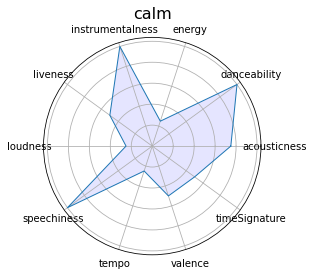

In [18]:
import matplotlib.pyplot as plt


new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = Visualization.Viz()
viz.createSpider(avgMoods, 0, 0, new_ax, 0, True).show()


new instance of Viz class


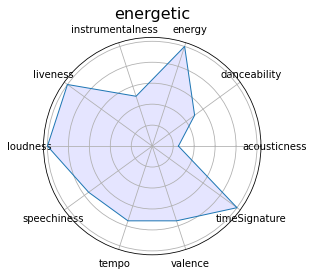

In [19]:
import matplotlib.pyplot as plt


new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = Visualization.Viz()
viz.createSpider(avgMoods, 0, 1, new_ax, 0, True).show()

new instance of Viz class


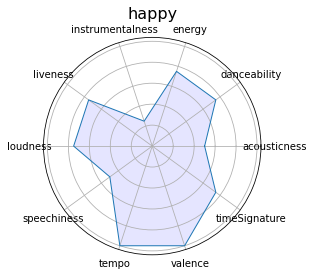

In [20]:
import matplotlib.pyplot as plt


new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = Visualization.Viz()
viz.createSpider(avgMoods, 0, 2, new_ax, 1, True).show()

new instance of Viz class


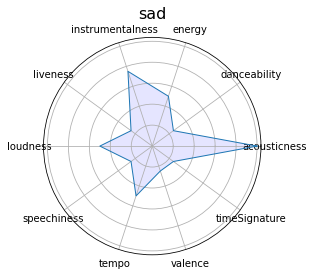

In [21]:
import matplotlib.pyplot as plt


new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = Visualization.Viz()
viz.createSpider(avgMoods, 0, 3, new_ax, 1, True).show()

## Training Data

In [18]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
encoder = LabelEncoder()

# get this from the csv, ex a couple cells up
X = pd.read_csv('./Data/Training/Train.csv')
X = X[X['mood'].isin(['energetic', 'happy'])]
X['name'] = X['name'].apply(lambda name : "{} BY {}...".format(name, list(X[X['name'] == name]['artist'])[0][:10]))

artists = X['artist']
names = X['name']
y = X['mood']
yLabels = y.copy()

X = X.drop(['mood', 'uri','artist', 'genres', 'length', 'timeSignature'], axis=1)
X = X.set_index('name')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
y = encoder.fit_transform(y)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=15, shuffle=True)


In [5]:
names

766       Twist And Shout - Remastered BY The Beatle...
767                Hooked on a Feeling BY Blue Swede...
768                             A-Punk BY Vampire We...
769                       Don't Stop Me Now BY Queen...
770     Uptown Funk (feat. Bruno Mars) BY Mark Ronso...
                             ...                       
1427                          Supernova BY Kai Straw...
1428            HUMBLE. - SKRILLEX REMIX BY Skrillex...
1429                You Got to Love Me BY DAVID AUGU...
1430        Be Yourself (Extended Mix) BY Kazy Lambi...
1431                           Apolune BY Jesper Ryo...
Name: name, Length: 666, dtype: object

In [6]:
artists

766         The Beatles
767          Blue Swede
768     Vampire Weekend
769               Queen
770         Mark Ronson
             ...       
1427          Kai Straw
1428           Skrillex
1429       DAVID AUGUST
1430       Kazy Lambist
1431        Jesper Ryom
Name: artist, Length: 666, dtype: object

In [7]:
# Encodings

pd.DataFrame({'mood' : yLabels, 'encoding' : y}).drop_duplicates().set_index('mood')

,encoding
mood,
happy,1
energetic,0


## Kmeans Classifier

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

clf = KMeans(n_clusters=2, random_state=0)
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

display(y_preds)
y_test
accuracy_score(y_test, y_preds)


array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1], dtype=int32)

array([1, 2, 3, 3, 1, 2, 0, 3, 0, 1, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 3, 2, 0, 3, 1, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 1, 0, 0, 0, 3,
       0, 1, 3, 2, 2, 2, 2, 0, 1, 3, 0, 0, 1, 3, 0, 0, 3, 1, 1, 1, 1, 0,
       0, 3, 0, 1, 3, 2, 2, 2, 0, 1, 2, 2, 1, 2, 3, 0, 2, 0, 2, 3, 2, 0,
       3, 0, 0, 0, 0, 2, 0, 0, 3, 2, 1, 3, 1, 1, 0, 0, 2, 0, 3, 0, 0, 1,
       1, 0, 0, 3, 3, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,
       0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 1,
       2, 0, 3, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 3, 0, 3,
       3, 3, 0, 3, 0, 0, 3, 2, 0, 3, 2, 0, 3, 0, 0, 2, 3, 0, 2, 3, 0, 2,
       2, 0, 2, 2, 3, 3, 0, 3, 0, 3, 0, 3, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 2, 3, 3, 3, 2, 0, 2, 0, 1, 3, 1,
       2, 3, 0, 2, 3, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0,
       3, 0, 3, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2,
       0, 0, 3, 0, 1, 3, 3, 3, 3, 0, 2, 3, 1, 0, 0,

## Random Forest Classifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA




data = pd.read_csv('./Data/Training/Train.csv')
accuracy = []

for i in range(50):
    pca = PCA(n_components=6)

    y = data['mood']
    X = data.drop(columns=['mood', 'artist', 'name', 'uri', 'genres', 'length', 'timeSignature'])

    components = pca.fit_transform(X)
    X = pd.DataFrame(data = components, columns = ['c1' ,'c2', 'c3', 'c4', 'c5', 'c6'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

    clf = RandomForestClassifier(max_depth=7, random_state=0)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy.append(accuracy_score(y_test, y_pred))

np.mean(accuracy)



0.70304932735426

## Deep Learning Classifier

In [12]:
#Libraries to create the Multi-class Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle 

#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()


def base_model():
    #Create the model
    model = Sequential()
#Add 1 layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(8,input_dim=9,activation='relu'))
#Add 1 layer with output 3 and softmax function
    model.add(Dense(2,activation='softmax'))
#Compile the model using logistic loss function and adam     optimizer, accuracy correspond to the metric displayed
    model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=base_model,epochs=250, batch_size=200, verbose=1)

kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,y,cv=kfold, error_score='raise')
print("%.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

# #Train the model with the train data
estimator.fit(X_train,Y_train)

# pickle the model 
# with open('./Data/Model/Trained.pkl', 'wb') as f:
#     pickle.dump(estimator, f)

#Predict the model with the test 
y_preds = estimator.predict_proba(X_test)
discretePredictions = np.apply_along_axis(lambda arr : np.argmax(arr), 1, y_preds)

#Show the accuracy score 
print("Accuracy Score",accuracy_score(Y_test,discretePredictions))
cm = confusion_matrix(Y_test,discretePredictions)



Train on 599 samples
Epoch 1/250
599/599 [==============================] - 0s 104us/sample - loss: 0.7510 - acc: 0.4674
Epoch 2/250
599/599 [==============================] - 0s 8us/sample - loss: 0.7468 - acc: 0.4674
Epoch 3/250
599/599 [==============================] - 0s 10us/sample - loss: 0.7427 - acc: 0.4641
Epoch 4/250
599/599 [==============================] - 0s 10us/sample - loss: 0.7389 - acc: 0.4641
Epoch 5/250
599/599 [==============================] - 0s 10us/sample - loss: 0.7353 - acc: 0.4658
Epoch 6/250
599/599 [==============================] - 0s 10us/sample - loss: 0.7319 - acc: 0.4708
Epoch 7/250
599/599 [==============================] - 0s 11us/sample - loss: 0.7286 - acc: 0.4674
Epoch 8/250
599/599 [==============================] - 0s 9us/sample - loss: 0.7256 - acc: 0.4658
Epoch 9/250
599/599 [==============================] - 0s 11us/sample - loss: 0.7226 - acc: 0.4725
Epoch 10/250
599/599 [==============================] - 0s 10us/sample - loss: 0.7201 - a

599/599 [==============================] - 0s 9us/sample - loss: 0.5603 - acc: 0.7479
Epoch 165/250
599/599 [==============================] - 0s 10us/sample - loss: 0.5598 - acc: 0.7446
Epoch 166/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5592 - acc: 0.7446
Epoch 167/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5586 - acc: 0.7429
Epoch 168/250
599/599 [==============================] - 0s 10us/sample - loss: 0.5580 - acc: 0.7429
Epoch 169/250
599/599 [==============================] - 0s 11us/sample - loss: 0.5575 - acc: 0.7446
Epoch 170/250
599/599 [==============================] - 0s 10us/sample - loss: 0.5570 - acc: 0.7462
Epoch 171/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5564 - acc: 0.7479
Epoch 172/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5561 - acc: 0.7462
Epoch 173/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5554 - acc: 0.7446
Epoch 174/

/opt/tljh/user/lib/python3.7/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 599 samples
Epoch 1/250
599/599 [==============================] - 0s 106us/sample - loss: 0.7075 - acc: 0.5209
Epoch 2/250
599/599 [==============================] - 0s 7us/sample - loss: 0.6985 - acc: 0.5225
Epoch 3/250
599/599 [==============================] - 0s 11us/sample - loss: 0.6896 - acc: 0.5259
Epoch 4/250
599/599 [==============================] - 0s 7us/sample - loss: 0.6822 - acc: 0.5259
Epoch 5/250
599/599 [==============================] - 0s 7us/sample - loss: 0.6749 - acc: 0.5326
Epoch 6/250
599/599 [==============================] - 0s 9us/sample - loss: 0.6686 - acc: 0.5492
Epoch 7/250
599/599 [==============================] - 0s 11us/sample - loss: 0.6634 - acc: 0.5659
Epoch 8/250
599/599 [==============================] - 0s 9us/sample - loss: 0.6582 - acc: 0.5760
Epoch 9/250
599/599 [==============================] - 0s 14us/sample - loss: 0.6537 - acc: 0.5826
Epoch 10/250
599/599 [==============================] - 0s 16us/sample - loss: 0.6500 - acc:

599/599 [==============================] - 0s 9us/sample - loss: 0.5277 - acc: 0.7312
Epoch 165/250
599/599 [==============================] - 0s 12us/sample - loss: 0.5276 - acc: 0.7312
Epoch 166/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5274 - acc: 0.7312
Epoch 167/250
599/599 [==============================] - 0s 10us/sample - loss: 0.5272 - acc: 0.7312
Epoch 168/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5270 - acc: 0.7295
Epoch 169/250
599/599 [==============================] - 0s 10us/sample - loss: 0.5267 - acc: 0.7279
Epoch 170/250
599/599 [==============================] - 0s 13us/sample - loss: 0.5265 - acc: 0.7312
Epoch 171/250
599/599 [==============================] - 0s 13us/sample - loss: 0.5263 - acc: 0.7312
Epoch 172/250
599/599 [==============================] - 0s 12us/sample - loss: 0.5261 - acc: 0.7312
Epoch 173/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5259 - acc: 0.7295
Epoch 17

/opt/tljh/user/lib/python3.7/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 599 samples
Epoch 1/250
599/599 [==============================] - 0s 107us/sample - loss: 1.0733 - acc: 0.5125
Epoch 2/250
599/599 [==============================] - 0s 7us/sample - loss: 1.0555 - acc: 0.5125
Epoch 3/250
599/599 [==============================] - 0s 6us/sample - loss: 1.0374 - acc: 0.5125
Epoch 4/250
599/599 [==============================] - 0s 6us/sample - loss: 1.0196 - acc: 0.5125
Epoch 5/250
599/599 [==============================] - 0s 8us/sample - loss: 1.0035 - acc: 0.5125
Epoch 6/250
599/599 [==============================] - 0s 10us/sample - loss: 0.9866 - acc: 0.5125
Epoch 7/250
599/599 [==============================] - 0s 11us/sample - loss: 0.9713 - acc: 0.5109
Epoch 8/250
599/599 [==============================] - 0s 9us/sample - loss: 0.9563 - acc: 0.5109
Epoch 9/250
599/599 [==============================] - 0s 10us/sample - loss: 0.9420 - acc: 0.5109
Epoch 10/250
599/599 [==============================] - 0s 9us/sample - loss: 0.9281 - acc: 

599/599 [==============================] - 0s 10us/sample - loss: 0.5570 - acc: 0.7129
Epoch 165/250
599/599 [==============================] - 0s 10us/sample - loss: 0.5562 - acc: 0.7129
Epoch 166/250
599/599 [==============================] - 0s 12us/sample - loss: 0.5554 - acc: 0.7129
Epoch 167/250
599/599 [==============================] - 0s 12us/sample - loss: 0.5546 - acc: 0.7129
Epoch 168/250
599/599 [==============================] - 0s 10us/sample - loss: 0.5537 - acc: 0.7129
Epoch 169/250
599/599 [==============================] - 0s 10us/sample - loss: 0.5530 - acc: 0.7129
Epoch 170/250
599/599 [==============================] - 0s 16us/sample - loss: 0.5522 - acc: 0.7129
Epoch 171/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5514 - acc: 0.7129
Epoch 172/250
599/599 [==============================] - 0s 16us/sample - loss: 0.5507 - acc: 0.7129
Epoch 173/250
599/599 [==============================] - 0s 13us/sample - loss: 0.5499 - acc: 0.7129
Epoch

/opt/tljh/user/lib/python3.7/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 599 samples
Epoch 1/250
599/599 [==============================] - 0s 111us/sample - loss: 0.7682 - acc: 0.5309
Epoch 2/250
599/599 [==============================] - 0s 8us/sample - loss: 0.7616 - acc: 0.5309
Epoch 3/250
599/599 [==============================] - 0s 6us/sample - loss: 0.7555 - acc: 0.5309
Epoch 4/250
599/599 [==============================] - 0s 6us/sample - loss: 0.7497 - acc: 0.5309
Epoch 5/250
599/599 [==============================] - 0s 11us/sample - loss: 0.7439 - acc: 0.5309
Epoch 6/250
599/599 [==============================] - 0s 7us/sample - loss: 0.7391 - acc: 0.5309
Epoch 7/250
599/599 [==============================] - 0s 9us/sample - loss: 0.7344 - acc: 0.5309
Epoch 8/250
599/599 [==============================] - 0s 11us/sample - loss: 0.7299 - acc: 0.5309
Epoch 9/250
599/599 [==============================] - 0s 9us/sample - loss: 0.7259 - acc: 0.5309
Epoch 10/250
599/599 [==============================] - 0s 9us/sample - loss: 0.7219 - acc: 0

599/599 [==============================] - 0s 12us/sample - loss: 0.6249 - acc: 0.6761
Epoch 84/250
599/599 [==============================] - 0s 8us/sample - loss: 0.6242 - acc: 0.6795
Epoch 85/250
599/599 [==============================] - 0s 10us/sample - loss: 0.6234 - acc: 0.6795
Epoch 86/250
599/599 [==============================] - 0s 11us/sample - loss: 0.6228 - acc: 0.6778
Epoch 87/250
599/599 [==============================] - 0s 11us/sample - loss: 0.6220 - acc: 0.6778
Epoch 88/250
599/599 [==============================] - 0s 12us/sample - loss: 0.6214 - acc: 0.6828
Epoch 89/250
599/599 [==============================] - 0s 13us/sample - loss: 0.6207 - acc: 0.6845
Epoch 90/250
599/599 [==============================] - 0s 10us/sample - loss: 0.6200 - acc: 0.6845
Epoch 91/250
599/599 [==============================] - 0s 17us/sample - loss: 0.6193 - acc: 0.6845
Epoch 92/250
599/599 [==============================] - 0s 10us/sample - loss: 0.6187 - acc: 0.6845
Epoch 93/250
5

599/599 [==============================] - 0s 13us/sample - loss: 0.5484 - acc: 0.7162
Epoch 246/250
599/599 [==============================] - 0s 8us/sample - loss: 0.5481 - acc: 0.7162
Epoch 247/250
599/599 [==============================] - 0s 10us/sample - loss: 0.5478 - acc: 0.7179
Epoch 248/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5476 - acc: 0.7179
Epoch 249/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5473 - acc: 0.7179
Epoch 250/250
599/599 [==============================] - 0s 10us/sample - loss: 0.5470 - acc: 0.7179


/opt/tljh/user/lib/python3.7/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 599 samples
Epoch 1/250
599/599 [==============================] - 0s 129us/sample - loss: 0.6776 - acc: 0.4992
Epoch 2/250
599/599 [==============================] - 0s 9us/sample - loss: 0.6759 - acc: 0.5109
Epoch 3/250
599/599 [==============================] - 0s 7us/sample - loss: 0.6741 - acc: 0.5242
Epoch 4/250
599/599 [==============================] - 0s 9us/sample - loss: 0.6728 - acc: 0.5442
Epoch 5/250
599/599 [==============================] - 0s 7us/sample - loss: 0.6713 - acc: 0.5543
Epoch 6/250
599/599 [==============================] - 0s 8us/sample - loss: 0.6700 - acc: 0.5626
Epoch 7/250
599/599 [==============================] - 0s 7us/sample - loss: 0.6688 - acc: 0.5810
Epoch 8/250
599/599 [==============================] - 0s 7us/sample - loss: 0.6674 - acc: 0.6043
Epoch 9/250
599/599 [==============================] - 0s 8us/sample - loss: 0.6661 - acc: 0.6160
Epoch 10/250
599/599 [==============================] - 0s 8us/sample - loss: 0.6649 - acc: 0.6

599/599 [==============================] - 0s 14us/sample - loss: 0.5624 - acc: 0.7295
Epoch 84/250
599/599 [==============================] - 0s 14us/sample - loss: 0.5613 - acc: 0.7295
Epoch 85/250
599/599 [==============================] - 0s 10us/sample - loss: 0.5602 - acc: 0.7295
Epoch 86/250
599/599 [==============================] - 0s 7us/sample - loss: 0.5591 - acc: 0.7295
Epoch 87/250
599/599 [==============================] - 0s 7us/sample - loss: 0.5580 - acc: 0.7312
Epoch 88/250
599/599 [==============================] - 0s 7us/sample - loss: 0.5571 - acc: 0.7295
Epoch 89/250
599/599 [==============================] - 0s 8us/sample - loss: 0.5560 - acc: 0.7295
Epoch 90/250
599/599 [==============================] - 0s 7us/sample - loss: 0.5549 - acc: 0.7295
Epoch 91/250
599/599 [==============================] - 0s 7us/sample - loss: 0.5539 - acc: 0.7295
Epoch 92/250
599/599 [==============================] - 0s 6us/sample - loss: 0.5532 - acc: 0.7295
Epoch 93/250
599/599

599/599 [==============================] - 0s 11us/sample - loss: 0.5019 - acc: 0.7513
Epoch 246/250
599/599 [==============================] - 0s 10us/sample - loss: 0.5019 - acc: 0.7513
Epoch 247/250
599/599 [==============================] - 0s 8us/sample - loss: 0.5017 - acc: 0.7513
Epoch 248/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5017 - acc: 0.7529
Epoch 249/250
599/599 [==============================] - 0s 9us/sample - loss: 0.5016 - acc: 0.7529
Epoch 250/250
599/599 [==============================] - 0s 11us/sample - loss: 0.5015 - acc: 0.7513


/opt/tljh/user/lib/python3.7/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 599 samples
Epoch 1/250
599/599 [==============================] - 0s 118us/sample - loss: 0.6982 - acc: 0.5342
Epoch 2/250
599/599 [==============================] - 0s 7us/sample - loss: 0.6972 - acc: 0.5309
Epoch 3/250
599/599 [==============================] - 0s 7us/sample - loss: 0.6964 - acc: 0.5326
Epoch 4/250
599/599 [==============================] - 0s 8us/sample - loss: 0.6956 - acc: 0.5342
Epoch 5/250
599/599 [==============================] - 0s 8us/sample - loss: 0.6949 - acc: 0.5326
Epoch 6/250
599/599 [==============================] - 0s 8us/sample - loss: 0.6942 - acc: 0.5326
Epoch 7/250
599/599 [==============================] - 0s 11us/sample - loss: 0.6934 - acc: 0.5326
Epoch 8/250
599/599 [==============================] - 0s 14us/sample - loss: 0.6928 - acc: 0.5326
Epoch 9/250
599/599 [==============================] - 0s 12us/sample - loss: 0.6920 - acc: 0.5342
Epoch 10/250
599/599 [==============================] - 0s 11us/sample - loss: 0.6912 - acc:

599/599 [==============================] - 0s 8us/sample - loss: 0.4956 - acc: 0.7629
Epoch 165/250
599/599 [==============================] - 0s 7us/sample - loss: 0.4954 - acc: 0.7629
Epoch 166/250
599/599 [==============================] - 0s 12us/sample - loss: 0.4951 - acc: 0.7629
Epoch 167/250
599/599 [==============================] - 0s 7us/sample - loss: 0.4949 - acc: 0.7629
Epoch 168/250
599/599 [==============================] - 0s 13us/sample - loss: 0.4946 - acc: 0.7629
Epoch 169/250
599/599 [==============================] - 0s 8us/sample - loss: 0.4942 - acc: 0.7629
Epoch 170/250
599/599 [==============================] - 0s 9us/sample - loss: 0.4940 - acc: 0.7629
Epoch 171/250
599/599 [==============================] - 0s 8us/sample - loss: 0.4938 - acc: 0.7596
Epoch 172/250
599/599 [==============================] - 0s 7us/sample - loss: 0.4935 - acc: 0.7596
Epoch 173/250
599/599 [==============================] - 0s 8us/sample - loss: 0.4933 - acc: 0.7596
Epoch 174/25

/opt/tljh/user/lib/python3.7/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 600 samples
Epoch 1/250
600/600 [==============================] - 0s 126us/sample - loss: 0.7085 - acc: 0.5250
Epoch 2/250
600/600 [==============================] - 0s 7us/sample - loss: 0.7054 - acc: 0.5250
Epoch 3/250
600/600 [==============================] - 0s 8us/sample - loss: 0.7025 - acc: 0.5250
Epoch 4/250
600/600 [==============================] - 0s 10us/sample - loss: 0.6993 - acc: 0.5250
Epoch 5/250
600/600 [==============================] - 0s 9us/sample - loss: 0.6969 - acc: 0.5250
Epoch 6/250
600/600 [==============================] - 0s 12us/sample - loss: 0.6940 - acc: 0.5267
Epoch 7/250
600/600 [==============================] - 0s 10us/sample - loss: 0.6916 - acc: 0.5267
Epoch 8/250
600/600 [==============================] - 0s 10us/sample - loss: 0.6894 - acc: 0.5267
Epoch 9/250
600/600 [==============================] - 0s 14us/sample - loss: 0.6871 - acc: 0.5267
Epoch 10/250
600/600 [==============================] - 0s 15us/sample - loss: 0.6853 - ac

600/600 [==============================] - 0s 10us/sample - loss: 0.5260 - acc: 0.7383
Epoch 165/250
600/600 [==============================] - 0s 10us/sample - loss: 0.5257 - acc: 0.7383
Epoch 166/250
600/600 [==============================] - 0s 11us/sample - loss: 0.5255 - acc: 0.7400
Epoch 167/250
600/600 [==============================] - 0s 10us/sample - loss: 0.5248 - acc: 0.7400
Epoch 168/250
600/600 [==============================] - 0s 8us/sample - loss: 0.5245 - acc: 0.7383
Epoch 169/250
600/600 [==============================] - 0s 9us/sample - loss: 0.5241 - acc: 0.7383
Epoch 170/250
600/600 [==============================] - 0s 12us/sample - loss: 0.5237 - acc: 0.7383
Epoch 171/250
600/600 [==============================] - 0s 10us/sample - loss: 0.5233 - acc: 0.7400
Epoch 172/250
600/600 [==============================] - 0s 9us/sample - loss: 0.5231 - acc: 0.7400
Epoch 173/250
600/600 [==============================] - 0s 10us/sample - loss: 0.5226 - acc: 0.7400
Epoch 1

/opt/tljh/user/lib/python3.7/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 600 samples
Epoch 1/250
600/600 [==============================] - 0s 159us/sample - loss: 0.6758 - acc: 0.6033
Epoch 2/250
600/600 [==============================] - 0s 8us/sample - loss: 0.6748 - acc: 0.6117
Epoch 3/250
600/600 [==============================] - 0s 8us/sample - loss: 0.6739 - acc: 0.6100
Epoch 4/250
600/600 [==============================] - 0s 9us/sample - loss: 0.6730 - acc: 0.6150
Epoch 5/250
600/600 [==============================] - 0s 9us/sample - loss: 0.6722 - acc: 0.6217
Epoch 6/250
600/600 [==============================] - 0s 11us/sample - loss: 0.6714 - acc: 0.6267
Epoch 7/250
600/600 [==============================] - 0s 12us/sample - loss: 0.6705 - acc: 0.6333
Epoch 8/250
600/600 [==============================] - 0s 9us/sample - loss: 0.6697 - acc: 0.6417
Epoch 9/250
600/600 [==============================] - 0s 8us/sample - loss: 0.6688 - acc: 0.6433
Epoch 10/250
600/600 [==============================] - 0s 10us/sample - loss: 0.6680 - acc: 

600/600 [==============================] - 0s 8us/sample - loss: 0.5332 - acc: 0.7400
Epoch 165/250
600/600 [==============================] - 0s 10us/sample - loss: 0.5328 - acc: 0.7383
Epoch 166/250
600/600 [==============================] - 0s 9us/sample - loss: 0.5321 - acc: 0.7383
Epoch 167/250
600/600 [==============================] - 0s 9us/sample - loss: 0.5316 - acc: 0.7383
Epoch 168/250
600/600 [==============================] - 0s 6us/sample - loss: 0.5310 - acc: 0.7400
Epoch 169/250
600/600 [==============================] - 0s 9us/sample - loss: 0.5305 - acc: 0.7400
Epoch 170/250
600/600 [==============================] - 0s 8us/sample - loss: 0.5300 - acc: 0.7400
Epoch 171/250
600/600 [==============================] - 0s 8us/sample - loss: 0.5296 - acc: 0.7417
Epoch 172/250
600/600 [==============================] - 0s 10us/sample - loss: 0.5290 - acc: 0.7383
Epoch 173/250
600/600 [==============================] - 0s 10us/sample - loss: 0.5288 - acc: 0.7350
Epoch 174/2

/opt/tljh/user/lib/python3.7/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 600 samples
Epoch 1/250
600/600 [==============================] - 0s 125us/sample - loss: 0.7078 - acc: 0.4900
Epoch 2/250
600/600 [==============================] - 0s 10us/sample - loss: 0.7054 - acc: 0.4900
Epoch 3/250
600/600 [==============================] - 0s 9us/sample - loss: 0.7040 - acc: 0.4900
Epoch 4/250
600/600 [==============================] - 0s 11us/sample - loss: 0.7021 - acc: 0.4900
Epoch 5/250
600/600 [==============================] - 0s 9us/sample - loss: 0.7005 - acc: 0.4917
Epoch 6/250
600/600 [==============================] - 0s 10us/sample - loss: 0.6989 - acc: 0.4900
Epoch 7/250
600/600 [==============================] - 0s 10us/sample - loss: 0.6977 - acc: 0.4917
Epoch 8/250
600/600 [==============================] - 0s 10us/sample - loss: 0.6965 - acc: 0.4850
Epoch 9/250
600/600 [==============================] - 0s 12us/sample - loss: 0.6953 - acc: 0.4717
Epoch 10/250
600/600 [==============================] - 0s 9us/sample - loss: 0.6943 - ac

600/600 [==============================] - 0s 11us/sample - loss: 0.5425 - acc: 0.7317
Epoch 164/250
600/600 [==============================] - 0s 11us/sample - loss: 0.5419 - acc: 0.7317
Epoch 165/250
600/600 [==============================] - 0s 8us/sample - loss: 0.5412 - acc: 0.7333
Epoch 166/250
600/600 [==============================] - 0s 9us/sample - loss: 0.5406 - acc: 0.7333
Epoch 167/250
600/600 [==============================] - 0s 11us/sample - loss: 0.5399 - acc: 0.7317
Epoch 168/250
600/600 [==============================] - 0s 8us/sample - loss: 0.5392 - acc: 0.7333
Epoch 169/250
600/600 [==============================] - 0s 7us/sample - loss: 0.5387 - acc: 0.7350
Epoch 170/250
600/600 [==============================] - 0s 8us/sample - loss: 0.5381 - acc: 0.7317
Epoch 171/250
600/600 [==============================] - 0s 10us/sample - loss: 0.5376 - acc: 0.7333
Epoch 172/250
600/600 [==============================] - 0s 10us/sample - loss: 0.5369 - acc: 0.7350
Epoch 173

/opt/tljh/user/lib/python3.7/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 600 samples
Epoch 1/250
600/600 [==============================] - 0s 132us/sample - loss: 0.6914 - acc: 0.5333
Epoch 2/250
600/600 [==============================] - 0s 8us/sample - loss: 0.6907 - acc: 0.5333
Epoch 3/250
600/600 [==============================] - 0s 8us/sample - loss: 0.6901 - acc: 0.5267
Epoch 4/250
600/600 [==============================] - 0s 8us/sample - loss: 0.6893 - acc: 0.5233
Epoch 5/250
600/600 [==============================] - 0s 10us/sample - loss: 0.6887 - acc: 0.5233
Epoch 6/250
600/600 [==============================] - 0s 9us/sample - loss: 0.6880 - acc: 0.5217
Epoch 7/250
600/600 [==============================] - 0s 10us/sample - loss: 0.6874 - acc: 0.5217
Epoch 8/250
600/600 [==============================] - 0s 9us/sample - loss: 0.6865 - acc: 0.5217
Epoch 9/250
600/600 [==============================] - 0s 9us/sample - loss: 0.6858 - acc: 0.5217
Epoch 10/250
600/600 [==============================] - 0s 9us/sample - loss: 0.6850 - acc: 0

Epoch 83/250
600/600 [==============================] - 0s 11us/sample - loss: 0.5863 - acc: 0.7267
Epoch 84/250
600/600 [==============================] - 0s 13us/sample - loss: 0.5850 - acc: 0.7250
Epoch 85/250
600/600 [==============================] - 0s 9us/sample - loss: 0.5838 - acc: 0.7233
Epoch 86/250
600/600 [==============================] - 0s 9us/sample - loss: 0.5825 - acc: 0.7233
Epoch 87/250
600/600 [==============================] - 0s 9us/sample - loss: 0.5813 - acc: 0.7250
Epoch 88/250
600/600 [==============================] - 0s 14us/sample - loss: 0.5801 - acc: 0.7283
Epoch 89/250
600/600 [==============================] - 0s 10us/sample - loss: 0.5789 - acc: 0.7333
Epoch 90/250
600/600 [==============================] - 0s 12us/sample - loss: 0.5777 - acc: 0.7333
Epoch 91/250
600/600 [==============================] - 0s 8us/sample - loss: 0.5766 - acc: 0.7333
Epoch 92/250
600/600 [==============================] - 0s 9us/sample - loss: 0.5754 - acc: 0.7317
Epoch

600/600 [==============================] - 0s 10us/sample - loss: 0.5102 - acc: 0.7400
Epoch 246/250
600/600 [==============================] - 0s 11us/sample - loss: 0.5101 - acc: 0.7417
Epoch 247/250
600/600 [==============================] - 0s 14us/sample - loss: 0.5100 - acc: 0.7417
Epoch 248/250
600/600 [==============================] - 0s 9us/sample - loss: 0.5099 - acc: 0.7433
Epoch 249/250
600/600 [==============================] - 0s 11us/sample - loss: 0.5099 - acc: 0.7433
Epoch 250/250
600/600 [==============================] - 0s 11us/sample - loss: 0.5098 - acc: 0.7433


/opt/tljh/user/lib/python3.7/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


73.41% (6.84%)
Train on 532 samples
Epoch 1/250
532/532 [==============================] - 0s 147us/sample - loss: 0.8539 - acc: 0.5357
Epoch 2/250
532/532 [==============================] - 0s 9us/sample - loss: 0.8383 - acc: 0.5357
Epoch 3/250
532/532 [==============================] - 0s 9us/sample - loss: 0.8236 - acc: 0.5357
Epoch 4/250
532/532 [==============================] - 0s 9us/sample - loss: 0.8104 - acc: 0.5357
Epoch 5/250
532/532 [==============================] - 0s 10us/sample - loss: 0.7974 - acc: 0.5395
Epoch 6/250
532/532 [==============================] - 0s 12us/sample - loss: 0.7862 - acc: 0.5395
Epoch 7/250
532/532 [==============================] - 0s 11us/sample - loss: 0.7753 - acc: 0.5395
Epoch 8/250
532/532 [==============================] - 0s 18us/sample - loss: 0.7654 - acc: 0.5395
Epoch 9/250
532/532 [==============================] - 0s 13us/sample - loss: 0.7564 - acc: 0.5395
Epoch 10/250
532/532 [==============================] - 0s 11us/sample - lo

532/532 [==============================] - 0s 12us/sample - loss: 0.5329 - acc: 0.7350
Epoch 164/250
532/532 [==============================] - 0s 11us/sample - loss: 0.5326 - acc: 0.7368
Epoch 165/250
532/532 [==============================] - 0s 10us/sample - loss: 0.5322 - acc: 0.7350
Epoch 166/250
532/532 [==============================] - 0s 10us/sample - loss: 0.5319 - acc: 0.7350
Epoch 167/250
532/532 [==============================] - 0s 14us/sample - loss: 0.5317 - acc: 0.7387
Epoch 168/250
532/532 [==============================] - 0s 15us/sample - loss: 0.5314 - acc: 0.7406
Epoch 169/250
532/532 [==============================] - 0s 10us/sample - loss: 0.5310 - acc: 0.7406
Epoch 170/250
532/532 [==============================] - 0s 9us/sample - loss: 0.5308 - acc: 0.7387
Epoch 171/250
532/532 [==============================] - 0s 9us/sample - loss: 0.5305 - acc: 0.7368
Epoch 172/250
532/532 [==============================] - 0s 9us/sample - loss: 0.5302 - acc: 0.7350
Epoch 1

Epoch 244/250
532/532 [==============================] - 0s 13us/sample - loss: 0.5180 - acc: 0.7500
Epoch 245/250
532/532 [==============================] - 0s 15us/sample - loss: 0.5179 - acc: 0.7500
Epoch 246/250
532/532 [==============================] - 0s 16us/sample - loss: 0.5177 - acc: 0.7500
Epoch 247/250
532/532 [==============================] - 0s 14us/sample - loss: 0.5176 - acc: 0.7500
Epoch 248/250
532/532 [==============================] - 0s 15us/sample - loss: 0.5175 - acc: 0.7481
Epoch 249/250
532/532 [==============================] - 0s 11us/sample - loss: 0.5175 - acc: 0.7462
Epoch 250/250
532/532 [==============================] - 0s 10us/sample - loss: 0.5175 - acc: 0.7481
Accuracy Score 0.746268656716418


In [13]:
y_preds

array([[0.63174015, 0.36825994],
       [0.6427938 , 0.35720617],
       [0.9600688 , 0.03993123],
       [0.72229075, 0.27770925],
       [0.5844483 , 0.4155517 ],
       [0.07425179, 0.92574817],
       [0.79182947, 0.20817052],
       [0.33684194, 0.663158  ],
       [0.370505  , 0.62949497],
       [0.81734073, 0.18265925],
       [0.866731  , 0.133269  ],
       [0.8740869 , 0.12591305],
       [0.21289916, 0.7871009 ],
       [0.5275189 , 0.47248107],
       [0.742167  , 0.25783303],
       [0.8194901 , 0.18050988],
       [0.44395038, 0.55604964],
       [0.823494  , 0.17650598],
       [0.07288116, 0.9271188 ],
       [0.7638355 , 0.23616445],
       [0.7330729 , 0.26692712],
       [0.13658841, 0.86341155],
       [0.77826196, 0.22173803],
       [0.13659006, 0.86340994],
       [0.26649433, 0.73350567],
       [0.09195173, 0.9080483 ],
       [0.6283637 , 0.37163624],
       [0.7120428 , 0.2879572 ],
       [0.09961214, 0.9003879 ],
       [0.67360055, 0.3263994 ],
       [0.

In [14]:
predictionDF = X_test.copy()
predictionDF['pctEnergetic'] = y_preds[:, 0]
predictionDF['pctHappy'] = y_preds[:, 1]
predictionDF

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctEnergetic,pctHappy
name,,,,,,,,,,,
Open Fire (feat. Daniel Johns) BY SLUMBERJAC...,0.019689,0.373153,0.671249,0.000040,0.030744,0.803057,0.161074,0.570702,0.362969,0.631740,0.368260
Somebody BY Dagny...,0.001811,0.699507,0.742268,0.000251,0.082916,0.819400,0.027265,0.327520,0.421461,0.642794,0.357206
Panda BY Desiigner...,0.029791,0.655172,0.705613,0.000000,0.402585,0.784740,0.815436,0.510885,0.240668,0.960069,0.039931
Before (feat. N & Kat Nestel) BY Scott Gold...,0.044893,0.513547,0.820160,0.000002,0.066729,0.896800,0.099832,0.609966,0.335319,0.722291,0.277709
Waiting BY RL Grime...,0.790815,0.422414,0.096220,0.929399,0.375801,0.254051,0.301594,0.085986,0.226842,0.584448,0.415552
...,...,...,...,...,...,...,...,...,...,...,...
Hey Baby BY Dimitri Ve...,0.017444,0.683498,0.908362,0.000000,0.067660,0.873066,0.333054,0.139508,0.861746,0.284173,0.715827
Moves Like Jagger - Studio Recording From The Voice Performance BY Maroon 5...,0.011934,0.700739,0.739977,0.000000,0.339700,0.832668,0.046770,0.395199,0.621397,0.418886,0.581114
Candyman BY Zedd...,0.021934,0.516010,0.857961,0.000000,0.409573,0.849240,0.047190,0.542495,0.234287,0.840371,0.159628


In [100]:
energeticDF = predictionDF[predictionDF['pctEnergetic']>=.5]
energeticDF.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctEnergetic,pctHappy
name,,,,,,,,,,,
Empty Room,0.014383,0.594022,0.725086,0.007292,0.126587,0.747510,0.056267,0.273857,0.469318,0.576297,0.423703
Show Your Colors (PLS&TY Remix),0.003995,0.494396,0.860252,0.000000,0.379294,0.920121,0.068024,0.637063,0.345953,0.820724,0.179276
Player - Jai Wolf Remix,0.066730,0.534247,0.867125,0.000192,0.023640,0.994399,0.043040,0.247197,0.166224,0.897955,0.102045
Be Yourself (Extended Mix),0.011015,0.767123,0.400916,0.533193,0.212763,0.616949,0.082931,0.326437,0.343826,0.767895,0.232105
Bittersweet Symphony (feat. Emily Roberts),0.225506,0.651308,0.534937,0.006607,0.572610,0.689391,0.214781,0.368082,0.433160,0.616581,0.383419
Takes My Body Higher (feat. Lincoln Jesser),0.242853,0.693649,0.706758,0.000000,0.142890,0.795620,0.026034,0.374942,0.093906,0.839285,0.160715
Inside Out,0.003138,0.488169,0.612829,0.000008,0.114941,0.768673,0.012177,0.502088,0.086462,0.865428,0.134572
Keep It Moving - Mozambo Remix,0.011525,0.722291,0.630011,0.000048,0.197624,0.705045,0.290363,0.253620,0.616080,0.547784,0.452216
Work This Body,0.028872,0.333748,0.820160,0.000000,0.513218,0.801956,0.168591,0.436494,0.476763,0.711154,0.288846


In [101]:
happyDF = predictionDF[predictionDF['pctHappy']>=.5]
happyDF.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctEnergetic,pctHappy
name,,,,,,,,,,,
Dreaming,0.000461,0.586550,0.873998,0.000000,0.049261,0.902676,0.053958,0.335086,0.891524,0.209588,0.790412
"For Richer, for Poorer",0.004495,0.678705,0.646048,0.000000,0.158030,0.730753,0.353349,0.543040,0.781984,0.412553,0.587447
Mad Behaviour - Seamus Haji Remix,0.033056,0.729763,0.709049,0.011907,0.090486,0.757701,0.045979,0.367974,0.711794,0.285431,0.714569
Best Fake Smile,0.023566,0.667497,0.884307,0.000000,0.293118,0.841344,0.035062,0.489155,0.954270,0.149975,0.850025
In with Me,0.006301,0.712329,0.636884,0.000000,0.063817,0.674563,0.089859,0.240519,0.613953,0.374926,0.625074
Rescue Me,0.159179,0.754670,0.561283,0.000000,0.781064,0.682183,0.036952,0.348154,0.638413,0.306938,0.693062
Show You Love,0.297956,0.666252,0.821306,0.000000,0.060091,0.800946,0.103506,0.367571,0.655429,0.289786,0.710214
How Will I Know,0.205098,0.845579,0.491409,0.000146,0.708862,0.454483,0.038841,0.337669,0.944699,0.066686,0.933314
Conga!,0.143873,0.783313,0.868270,0.060169,0.103296,0.708810,0.045769,0.362493,0.870254,0.136261,0.863739


In [104]:
happyDF.sort_values(by=['pctHappy'], ascending=False)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctEnergetic,pctHappy
name,,,,,,,,,,,
"Sugar, Sugar",0.772448,0.752179,0.609393,0.000003,0.086060,0.566175,0.008818,0.359736,0.989365,0.019439,0.980561
You Never Can Tell - 1964 Single Version / Mono,0.734692,0.523039,0.827033,0.000034,0.254687,0.568012,0.151165,0.590872,0.945762,0.029940,0.970060
Woo Hoo,0.746937,0.514321,0.797251,0.672287,0.666938,0.585227,0.037371,0.394527,0.979794,0.063845,0.936155
Think,0.167343,0.660025,0.623139,0.000000,0.261675,0.604738,0.032543,0.273521,0.935127,0.066267,0.933733
How Will I Know,0.205098,0.845579,0.491409,0.000146,0.708862,0.454483,0.038841,0.337669,0.944699,0.066686,0.933314
...,...,...,...,...,...,...,...,...,...,...,...
Still Got Time (feat. PARTYNEXTDOOR),0.133669,0.740971,0.586483,0.000000,0.072086,0.760593,0.080202,0.347576,0.515048,0.457002,0.542998
Moves Like Jagger - Studio Recording From The Voice Performance,0.011934,0.708593,0.739977,0.000000,0.339700,0.832668,0.045769,0.395199,0.621397,0.459565,0.540435
Flutter (Feat. Madi),0.029791,0.430884,0.773196,0.005479,0.066263,0.799247,0.106236,0.431995,0.610763,0.460651,0.539349


In [ ]:
energeticDF.sort_values(by=['pctEnergetic'], ascending=False)

## Now to try it on Michael's music

In [4]:
X = pd.read_csv('./Data/Training/Train.csv')
X = X[X['mood'].isin(['energetic', 'happy', 'sad', 'calm'])]
X['name'] = X['name'].apply(lambda name : "{} BY {}...".format(name, list(X[X['name'] == name]['artist'])[0][:10]))



namesToUri

,uri
feather light melodies BY santpoort...,7suV4LZglmw8Kf8JAMHxQU
Rained In BY Nathan Kaw...,19HQQW3lGcT8Yq7svGJnbA
Tiger Park BY Lo'fi Boy...,2RKFdXgtbivlmgSGnI7oEz
Origami BY Deauxnuts...,1Iloy9vXDfjeVSwv3qHpbo
Tracy BY Pontiac Pu...,2wKHx2Bg7AysBPrZ9axL1D
...,...
Set Fire to the Rain BY Adele...,5PKWUDfQFtc5qqo8cs1gQp
Won't Go Home Without You BY Maroon 5...,6WEBwvsmpaoGxka0tSh5a7
Charlene BY Anthony Ha...,0xiuSFBOEHWaJ6rSuUbJWc
Little Did I Know BY Julia Mich...,4hkSiyO1zy1scfc4HWMGR4


In [23]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix

scaler = MinMaxScaler()
encoder = LabelEncoder()

# get this from the csv, ex a couple cells up
X = pd.read_csv('./Data/Training/Train.csv')
X = X[X['mood'].isin(['energetic', 'happy', 'sad', 'calm'])]
X['name'] = X['name'].apply(lambda name : "{} BY {}...".format(name, list(X[X['name'] == name]['artist'])[0][:10]))

artists = X['artist']
names = X['name']
y = X['mood']
yLabels = y.copy()

X = X.drop(['mood','uri','artist', 'genres', 'length', 'timeSignature'], axis=1)
X = X.set_index('name')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
y = encoder.fit_transform(y)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=15, shuffle=True)

display(pd.DataFrame({'mood' : yLabels, 'encoding' : y}).drop_duplicates().set_index('mood'))
# --------
def base_model():
    #Create the model
    model = Sequential()
#Add 1 layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(8,input_dim=9,activation='relu'))
#Add 1 layer with output 3 and softmax function
    model.add(Dense(4,activation='softmax'))
#Compile the model using logistic loss function and adam     optimizer, accuracy correspond to the metric displayed
    model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=base_model,epochs=250, batch_size=200, verbose=1)

kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,y,cv=kfold, error_score='raise')
print("%.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

# #Train the model with the train data
estimator.fit(X_train,Y_train)

# pickle the model 
# with open('./Data/Model/Trained.pkl', 'wb') as f:
#     pickle.dump(estimator, f)

#Predict the model with the test 
y_preds = estimator.predict_proba(X_test)
discretePredictions = np.apply_along_axis(lambda arr : np.argmax(arr), 1, y_preds)

#Show the accuracy score 
print("Accuracy Score",accuracy_score(Y_test,discretePredictions))
cm = confusion_matrix(Y_test,discretePredictions)
# --------
X_test = pd.read_csv('./Data/mikeydays/Test.csv')
X_test['name'] = X_test['name'].apply(lambda name : "{} BY {}...".format(name, list(X_test[X_test['name'] == name]['artist'])[0][:10]))

namesToUri = pd.DataFrame({'uri' : X_test['uri'].values}, index=X_test['name'].values)
artists = X_test['artist']
names = X_test['name']
playlist = X_test['playlist']



X_test = X_test.drop(['playlist','uri','artist', 'genres', 'length', 'timeSignature'], axis=1)
X_test = X_test.set_index('name')
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns, index=X_test.index)

y_preds = estimator.predict_proba(X_test)
discretePredictions = np.apply_along_axis(lambda arr : np.argmax(arr), 1, y_preds)


predictionDF = X_test.copy()
predictionDF['pctCalm'] = y_preds[:, 0]
predictionDF['pctEnergetic'] = y_preds[:, 1]
predictionDF['pctHappy'] = y_preds[:, 2]
predictionDF['pctSad'] = y_preds[:, 3]

pcts = predictionDF.loc[:, 'pctCalm' : 'pctSad']
pcts['maxPct'] = list(pcts.max(axis=1))

calmDF = predictionDF[predictionDF['pctCalm'] == pcts['maxPct']]
energeticDF = predictionDF[predictionDF['pctEnergetic'] == pcts['maxPct']]
happyDF = predictionDF[predictionDF['pctHappy'] == pcts['maxPct']]
sadDF = predictionDF[predictionDF['pctSad'] == pcts['maxPct']]

display(calmDF)
display(energeticDF)
display(happyDF)
display(sadDF)


# energeticDF = predictionDF[predictionDF['pctEnergetisc']>=.5]

,encoding
mood,
calm,0
happy,2
energetic,1
sad,3


Epoch 1/250
9/9 [==============================] - 0s 869us/step - loss: 1.3856 - accuracy: 0.2245
Epoch 2/250
9/9 [==============================] - 0s 928us/step - loss: 1.3739 - accuracy: 0.2937
Epoch 3/250
9/9 [==============================] - 0s 888us/step - loss: 1.3709 - accuracy: 0.3512
Epoch 4/250
9/9 [==============================] - 0s 895us/step - loss: 1.3705 - accuracy: 0.4026
Epoch 5/250
9/9 [==============================] - 0s 972us/step - loss: 1.3487 - accuracy: 0.4647
Epoch 6/250
9/9 [==============================] - 0s 1ms/step - loss: 1.3381 - accuracy: 0.5125
Epoch 7/250
9/9 [==============================] - 0s 1ms/step - loss: 1.3229 - accuracy: 0.5579
Epoch 8/250
9/9 [==============================] - 0s 1ms/step - loss: 1.3102 - accuracy: 0.5545
Epoch 9/250
9/9 [==============================] - 0s 855us/step - loss: 1.3022 - accuracy: 0.5544
Epoch 10/250
9/9 [==============================] - 0s 1ms/step - loss: 1.2892 - accuracy: 0.5446
Epoch 11/250
9/9 

9/9 [==============================] - 0s 913us/step - loss: 0.7460 - accuracy: 0.7153
Epoch 84/250
9/9 [==============================] - 0s 982us/step - loss: 0.7594 - accuracy: 0.7012
Epoch 85/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7389 - accuracy: 0.7096
Epoch 86/250
9/9 [==============================] - 0s 911us/step - loss: 0.7475 - accuracy: 0.7201
Epoch 87/250
9/9 [==============================] - 0s 951us/step - loss: 0.7677 - accuracy: 0.7051
Epoch 88/250
9/9 [==============================] - 0s 994us/step - loss: 0.7399 - accuracy: 0.7024
Epoch 89/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7433 - accuracy: 0.7000
Epoch 90/250
9/9 [==============================] - 0s 765us/step - loss: 0.7415 - accuracy: 0.7117
Epoch 91/250
9/9 [==============================] - 0s 777us/step - loss: 0.7342 - accuracy: 0.7224
Epoch 92/250
9/9 [==============================] - 0s 919us/step - loss: 0.7487 - accuracy: 0.7070
Epoch 93/250
9/9 

9/9 [==============================] - 0s 723us/step - loss: 0.6907 - accuracy: 0.7335
Epoch 166/250
9/9 [==============================] - 0s 674us/step - loss: 0.7063 - accuracy: 0.7248
Epoch 167/250
9/9 [==============================] - 0s 710us/step - loss: 0.6958 - accuracy: 0.7212
Epoch 168/250
9/9 [==============================] - 0s 785us/step - loss: 0.6858 - accuracy: 0.7308
Epoch 169/250
9/9 [==============================] - 0s 770us/step - loss: 0.7057 - accuracy: 0.7163
Epoch 170/250
9/9 [==============================] - 0s 814us/step - loss: 0.6811 - accuracy: 0.7339
Epoch 171/250
9/9 [==============================] - 0s 846us/step - loss: 0.6961 - accuracy: 0.7111
Epoch 172/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.7391
Epoch 173/250
9/9 [==============================] - 0s 910us/step - loss: 0.6918 - accuracy: 0.7198
Epoch 174/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.7156
Epoch 17

9/9 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.7198
Epoch 248/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.7236
Epoch 249/250
9/9 [==============================] - 0s 949us/step - loss: 0.6577 - accuracy: 0.7234
Epoch 250/250
1/1 [==============================] - 0s 152ms/step - loss: 0.6832 - accuracy: 0.7151
Epoch 1/250
9/9 [==============================] - 0s 1ms/step - loss: 1.3333 - accuracy: 0.3749
Epoch 2/250
9/9 [==============================] - 0s 1ms/step - loss: 1.3173 - accuracy: 0.3971
Epoch 3/250
9/9 [==============================] - 0s 1ms/step - loss: 1.3036 - accuracy: 0.3960
Epoch 4/250
9/9 [==============================] - 0s 1ms/step - loss: 1.2861 - accuracy: 0.4030
Epoch 5/250
9/9 [==============================] - 0s 1ms/step - loss: 1.2801 - accuracy: 0.3983
Epoch 6/250
9/9 [==============================] - 0s 2ms/step - loss: 1.2598 - accuracy: 0.4214
Epoch 7/250
9/9 [===============

9/9 [==============================] - 0s 2ms/step - loss: 0.7622 - accuracy: 0.7094
Epoch 80/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7436 - accuracy: 0.7071
Epoch 81/250
9/9 [==============================] - 0s 2ms/step - loss: 0.7637 - accuracy: 0.7049
Epoch 82/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7680 - accuracy: 0.7067
Epoch 83/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7231 - accuracy: 0.7314
Epoch 84/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7572 - accuracy: 0.7131
Epoch 85/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7378 - accuracy: 0.7199
Epoch 86/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7496 - accuracy: 0.7149
Epoch 87/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7500 - accuracy: 0.7180
Epoch 88/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7454 - accuracy: 0.7207
Epoch 89/250
9/9 [===============

9/9 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.7151
Epoch 162/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.7114
Epoch 163/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.7241
Epoch 164/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6792 - accuracy: 0.7254
Epoch 165/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.7090
Epoch 166/250
9/9 [==============================] - 0s 995us/step - loss: 0.6667 - accuracy: 0.7272
Epoch 167/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.7128
Epoch 168/250
9/9 [==============================] - 0s 800us/step - loss: 0.6782 - accuracy: 0.7247
Epoch 169/250
9/9 [==============================] - 0s 842us/step - loss: 0.6905 - accuracy: 0.7269
Epoch 170/250
9/9 [==============================] - 0s 979us/step - loss: 0.6787 - accuracy: 0.7249
Epoch 171/250
9/

9/9 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.7227
Epoch 244/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.7246
Epoch 245/250
9/9 [==============================] - 0s 800us/step - loss: 0.6790 - accuracy: 0.7141
Epoch 246/250
9/9 [==============================] - 0s 745us/step - loss: 0.6608 - accuracy: 0.7224
Epoch 247/250
9/9 [==============================] - 0s 822us/step - loss: 0.6843 - accuracy: 0.7061
Epoch 248/250
9/9 [==============================] - 0s 982us/step - loss: 0.6721 - accuracy: 0.7146
Epoch 249/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.7155
Epoch 250/250
1/1 [==============================] - 0s 165ms/step - loss: 0.6985 - accuracy: 0.7207
Epoch 1/250
9/9 [==============================] - 0s 935us/step - loss: 1.4506 - accuracy: 0.2388
Epoch 2/250
9/9 [==============================] - 0s 1ms/step - loss: 1.4021 - accuracy: 0.2654
Epoch 3/250
9/9 

9/9 [==============================] - 0s 1ms/step - loss: 0.7893 - accuracy: 0.6563
Epoch 76/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7877 - accuracy: 0.6574
Epoch 77/250
9/9 [==============================] - 0s 767us/step - loss: 0.7868 - accuracy: 0.6572
Epoch 78/250
9/9 [==============================] - 0s 821us/step - loss: 0.7791 - accuracy: 0.6688
Epoch 79/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7806 - accuracy: 0.6570
Epoch 80/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7909 - accuracy: 0.6463
Epoch 81/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7846 - accuracy: 0.6602
Epoch 82/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7677 - accuracy: 0.6625
Epoch 83/250
9/9 [==============================] - 0s 820us/step - loss: 0.7941 - accuracy: 0.6568
Epoch 84/250
9/9 [==============================] - 0s 831us/step - loss: 0.8032 - accuracy: 0.6557
Epoch 85/250
9/9 [=======

9/9 [==============================] - 0s 846us/step - loss: 0.7013 - accuracy: 0.7171
Epoch 158/250
9/9 [==============================] - 0s 770us/step - loss: 0.6880 - accuracy: 0.7240
Epoch 159/250
9/9 [==============================] - 0s 667us/step - loss: 0.7215 - accuracy: 0.7044
Epoch 160/250
9/9 [==============================] - 0s 708us/step - loss: 0.7046 - accuracy: 0.7170
Epoch 161/250
9/9 [==============================] - 0s 779us/step - loss: 0.7030 - accuracy: 0.7093
Epoch 162/250
9/9 [==============================] - 0s 902us/step - loss: 0.7039 - accuracy: 0.7063
Epoch 163/250
9/9 [==============================] - 0s 951us/step - loss: 0.6980 - accuracy: 0.7137
Epoch 164/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7084 - accuracy: 0.7135
Epoch 165/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7123 - accuracy: 0.7157
Epoch 166/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.7176
Epoch 167/

9/9 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.7102
Epoch 240/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.7085
Epoch 241/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.7095
Epoch 242/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.7241
Epoch 243/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.7150
Epoch 244/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7029 - accuracy: 0.7056
Epoch 245/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.7166
Epoch 246/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.7222
Epoch 247/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.7121
Epoch 248/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.7077
Epoch 249/250
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.8060 - accuracy: 0.6794
Epoch 72/250
9/9 [==============================] - 0s 1ms/step - loss: 0.8025 - accuracy: 0.6755
Epoch 73/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7880 - accuracy: 0.6782
Epoch 74/250
9/9 [==============================] - 0s 2ms/step - loss: 0.7808 - accuracy: 0.6822
Epoch 75/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7920 - accuracy: 0.6836
Epoch 76/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7709 - accuracy: 0.6799
Epoch 77/250
9/9 [==============================] - 0s 1ms/step - loss: 0.8090 - accuracy: 0.6657
Epoch 78/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7978 - accuracy: 0.6695
Epoch 79/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7941 - accuracy: 0.6756
Epoch 80/250
9/9 [==============================] - 0s 966us/step - loss: 0.7776 - accuracy: 0.6824
Epoch 81/250
9/9 [=============

9/9 [==============================] - 0s 1ms/step - loss: 0.7183 - accuracy: 0.7109
Epoch 154/250
9/9 [==============================] - 0s 955us/step - loss: 0.7233 - accuracy: 0.7070
Epoch 155/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7248 - accuracy: 0.7051
Epoch 156/250
9/9 [==============================] - 0s 987us/step - loss: 0.7081 - accuracy: 0.7117
Epoch 157/250
9/9 [==============================] - 0s 840us/step - loss: 0.7257 - accuracy: 0.6975
Epoch 158/250
9/9 [==============================] - 0s 854us/step - loss: 0.7401 - accuracy: 0.6992
Epoch 159/250
9/9 [==============================] - 0s 992us/step - loss: 0.7206 - accuracy: 0.7121
Epoch 160/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7016 - accuracy: 0.7077
Epoch 161/250
9/9 [==============================] - 0s 792us/step - loss: 0.7126 - accuracy: 0.7206
Epoch 162/250
9/9 [==============================] - 0s 878us/step - loss: 0.7420 - accuracy: 0.7011
Epoch 163/

9/9 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.7248
Epoch 235/250
9/9 [==============================] - 0s 901us/step - loss: 0.7020 - accuracy: 0.7116
Epoch 236/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7121 - accuracy: 0.7054
Epoch 237/250
9/9 [==============================] - 0s 749us/step - loss: 0.6978 - accuracy: 0.7186
Epoch 238/250
9/9 [==============================] - 0s 727us/step - loss: 0.6883 - accuracy: 0.7126
Epoch 239/250
9/9 [==============================] - 0s 802us/step - loss: 0.6831 - accuracy: 0.7226
Epoch 240/250
9/9 [==============================] - 0s 748us/step - loss: 0.6842 - accuracy: 0.7181
Epoch 241/250
9/9 [==============================] - 0s 747us/step - loss: 0.7084 - accuracy: 0.7015
Epoch 242/250
9/9 [==============================] - 0s 807us/step - loss: 0.6941 - accuracy: 0.7136
Epoch 243/250
9/9 [==============================] - 0s 817us/step - loss: 0.7141 - accuracy: 0.7071
Epoch 24

9/9 [==============================] - 0s 918us/step - loss: 0.8675 - accuracy: 0.6093
Epoch 67/250
9/9 [==============================] - 0s 863us/step - loss: 0.8615 - accuracy: 0.6198
Epoch 68/250
9/9 [==============================] - 0s 836us/step - loss: 0.8456 - accuracy: 0.6282
Epoch 69/250
9/9 [==============================] - 0s 939us/step - loss: 0.8341 - accuracy: 0.6416
Epoch 70/250
9/9 [==============================] - 0s 1ms/step - loss: 0.8494 - accuracy: 0.6355
Epoch 71/250
9/9 [==============================] - 0s 1ms/step - loss: 0.8407 - accuracy: 0.6397
Epoch 72/250
9/9 [==============================] - 0s 1ms/step - loss: 0.8325 - accuracy: 0.6323
Epoch 73/250
9/9 [==============================] - 0s 2ms/step - loss: 0.8407 - accuracy: 0.6452
Epoch 74/250
9/9 [==============================] - 0s 1ms/step - loss: 0.8293 - accuracy: 0.6319
Epoch 75/250
9/9 [==============================] - 0s 1ms/step - loss: 0.8251 - accuracy: 0.6341
Epoch 76/250
9/9 [=======

9/9 [==============================] - 0s 1ms/step - loss: 0.7311 - accuracy: 0.7152
Epoch 150/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7476 - accuracy: 0.7015
Epoch 151/250
9/9 [==============================] - 0s 2ms/step - loss: 0.7657 - accuracy: 0.6975
Epoch 152/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7476 - accuracy: 0.7028
Epoch 153/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7330 - accuracy: 0.7072
Epoch 154/250
9/9 [==============================] - 0s 2ms/step - loss: 0.7554 - accuracy: 0.6980
Epoch 155/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7187 - accuracy: 0.7210
Epoch 156/250
9/9 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.7264
Epoch 157/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7039 - accuracy: 0.7160
Epoch 158/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7349 - accuracy: 0.7125
Epoch 159/250
9/9 [=====

9/9 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.7319
Epoch 232/250
9/9 [==============================] - 0s 990us/step - loss: 0.6989 - accuracy: 0.7130
Epoch 233/250
9/9 [==============================] - 0s 979us/step - loss: 0.6906 - accuracy: 0.7221
Epoch 234/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.7149
Epoch 235/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.7255
Epoch 236/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.7281
Epoch 237/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.7196
Epoch 238/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.7235
Epoch 239/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.7183
Epoch 240/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.7092
Epoch 241/250
9/9 [=

Epoch 63/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9673 - accuracy: 0.6155
Epoch 64/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9664 - accuracy: 0.6202
Epoch 65/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9724 - accuracy: 0.6184
Epoch 66/250
9/9 [==============================] - 0s 820us/step - loss: 0.9603 - accuracy: 0.6229
Epoch 67/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9610 - accuracy: 0.6202
Epoch 68/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9438 - accuracy: 0.6230
Epoch 69/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9453 - accuracy: 0.6242
Epoch 70/250
9/9 [==============================] - 0s 992us/step - loss: 0.9095 - accuracy: 0.6523
Epoch 71/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9458 - accuracy: 0.6275
Epoch 72/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9147 - accuracy: 0.6342
Epoch 73/250
9/9

9/9 [==============================] - 0s 788us/step - loss: 0.8000 - accuracy: 0.6828
Epoch 146/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7887 - accuracy: 0.6800
Epoch 147/250
9/9 [==============================] - 0s 2ms/step - loss: 0.7972 - accuracy: 0.6796
Epoch 148/250
9/9 [==============================] - 0s 880us/step - loss: 0.7659 - accuracy: 0.6935
Epoch 149/250
9/9 [==============================] - 0s 803us/step - loss: 0.7789 - accuracy: 0.6945
Epoch 150/250
9/9 [==============================] - 0s 831us/step - loss: 0.7942 - accuracy: 0.6825
Epoch 151/250
9/9 [==============================] - 0s 870us/step - loss: 0.7943 - accuracy: 0.6838
Epoch 152/250
9/9 [==============================] - 0s 905us/step - loss: 0.7813 - accuracy: 0.6885
Epoch 153/250
9/9 [==============================] - 0s 962us/step - loss: 0.7793 - accuracy: 0.6763
Epoch 154/250
9/9 [==============================] - 0s 971us/step - loss: 0.7824 - accuracy: 0.6930
Epoch 15

9/9 [==============================] - 0s 912us/step - loss: 0.7308 - accuracy: 0.6986
Epoch 227/250
9/9 [==============================] - 0s 765us/step - loss: 0.7420 - accuracy: 0.6935
Epoch 228/250
9/9 [==============================] - 0s 769us/step - loss: 0.7402 - accuracy: 0.6939
Epoch 229/250
9/9 [==============================] - 0s 850us/step - loss: 0.7342 - accuracy: 0.6997
Epoch 230/250
9/9 [==============================] - 0s 962us/step - loss: 0.7297 - accuracy: 0.7088
Epoch 231/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7247 - accuracy: 0.7066
Epoch 232/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7428 - accuracy: 0.6974
Epoch 233/250
9/9 [==============================] - 0s 985us/step - loss: 0.7303 - accuracy: 0.6878
Epoch 234/250
9/9 [==============================] - 0s 959us/step - loss: 0.7281 - accuracy: 0.6865
Epoch 235/250
9/9 [==============================] - 0s 989us/step - loss: 0.7426 - accuracy: 0.6895
Epoch 23

9/9 [==============================] - 0s 922us/step - loss: 0.8661 - accuracy: 0.6551
Epoch 58/250
9/9 [==============================] - 0s 917us/step - loss: 0.8710 - accuracy: 0.6551
Epoch 59/250
9/9 [==============================] - 0s 1ms/step - loss: 0.8625 - accuracy: 0.6490
Epoch 60/250
9/9 [==============================] - 0s 944us/step - loss: 0.8585 - accuracy: 0.6406
Epoch 61/250
9/9 [==============================] - 0s 2ms/step - loss: 0.8819 - accuracy: 0.6299
Epoch 62/250
9/9 [==============================] - 0s 907us/step - loss: 0.8435 - accuracy: 0.6559
Epoch 63/250
9/9 [==============================] - 0s 845us/step - loss: 0.8204 - accuracy: 0.6713
Epoch 64/250
9/9 [==============================] - 0s 946us/step - loss: 0.8429 - accuracy: 0.6508
Epoch 65/250
9/9 [==============================] - 0s 924us/step - loss: 0.8382 - accuracy: 0.6644
Epoch 66/250
9/9 [==============================] - 0s 1ms/step - loss: 0.8152 - accuracy: 0.6679
Epoch 67/250
9/9 [=

9/9 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.7172
Epoch 140/250
9/9 [==============================] - 0s 911us/step - loss: 0.6806 - accuracy: 0.7175
Epoch 141/250
9/9 [==============================] - 0s 926us/step - loss: 0.6820 - accuracy: 0.7167
Epoch 142/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.7051
Epoch 143/250
9/9 [==============================] - 0s 962us/step - loss: 0.7064 - accuracy: 0.7009
Epoch 144/250
9/9 [==============================] - 0s 931us/step - loss: 0.6783 - accuracy: 0.7253
Epoch 145/250
9/9 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.7094
Epoch 146/250
9/9 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.7168
Epoch 147/250
9/9 [==============================] - 0s 988us/step - loss: 0.6815 - accuracy: 0.7099
Epoch 148/250
9/9 [==============================] - 0s 947us/step - loss: 0.6866 - accuracy: 0.7209
Epoch 149/25

9/9 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.7258
Epoch 221/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.7151
Epoch 222/250
9/9 [==============================] - 0s 873us/step - loss: 0.6723 - accuracy: 0.7253
Epoch 223/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.7113
Epoch 224/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.7118
Epoch 225/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.7176
Epoch 226/250
9/9 [==============================] - 0s 852us/step - loss: 0.6657 - accuracy: 0.7227
Epoch 227/250
9/9 [==============================] - 0s 877us/step - loss: 0.6772 - accuracy: 0.7179
Epoch 228/250
9/9 [==============================] - 0s 903us/step - loss: 0.6759 - accuracy: 0.7174
Epoch 229/250
9/9 [==============================] - 0s 956us/step - loss: 0.6615 - accuracy: 0.7198
Epoch 230/250


9/9 [==============================] - 0s 2ms/step - loss: 0.9909 - accuracy: 0.5789
Epoch 52/250
9/9 [==============================] - 0s 2ms/step - loss: 0.9593 - accuracy: 0.6074
Epoch 53/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9669 - accuracy: 0.5823
Epoch 54/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9489 - accuracy: 0.5972
Epoch 55/250
9/9 [==============================] - 0s 935us/step - loss: 0.9392 - accuracy: 0.6123
Epoch 56/250
9/9 [==============================] - 0s 995us/step - loss: 0.9488 - accuracy: 0.6018
Epoch 57/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9245 - accuracy: 0.6151
Epoch 58/250
9/9 [==============================] - 0s 875us/step - loss: 0.9286 - accuracy: 0.6106
Epoch 59/250
9/9 [==============================] - 0s 778us/step - loss: 0.9137 - accuracy: 0.6196
Epoch 60/250
9/9 [==============================] - 0s 717us/step - loss: 0.8873 - accuracy: 0.6286
Epoch 61/250
9/9 [=====

9/9 [==============================] - 0s 1ms/step - loss: 0.7271 - accuracy: 0.7066
Epoch 134/250
9/9 [==============================] - 0s 927us/step - loss: 0.7268 - accuracy: 0.7182
Epoch 135/250
9/9 [==============================] - 0s 955us/step - loss: 0.7137 - accuracy: 0.7140
Epoch 136/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.7246
Epoch 137/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7060 - accuracy: 0.7192
Epoch 138/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.7188
Epoch 139/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7188 - accuracy: 0.7165
Epoch 140/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7046 - accuracy: 0.7104
Epoch 141/250
9/9 [==============================] - 0s 918us/step - loss: 0.7467 - accuracy: 0.7037
Epoch 142/250
9/9 [==============================] - 0s 935us/step - loss: 0.7181 - accuracy: 0.7140
Epoch 143/250
9/

9/9 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.7113
Epoch 215/250
9/9 [==============================] - 0s 969us/step - loss: 0.6787 - accuracy: 0.7245
Epoch 216/250
9/9 [==============================] - 0s 729us/step - loss: 0.6608 - accuracy: 0.7276
Epoch 217/250
9/9 [==============================] - 0s 861us/step - loss: 0.6783 - accuracy: 0.7265
Epoch 218/250
9/9 [==============================] - 0s 848us/step - loss: 0.6776 - accuracy: 0.7180
Epoch 219/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.7201
Epoch 220/250
9/9 [==============================] - 0s 973us/step - loss: 0.6830 - accuracy: 0.7191
Epoch 221/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.7178
Epoch 222/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.7258
Epoch 223/250
9/9 [==============================] - 0s 906us/step - loss: 0.6698 - accuracy: 0.7161
Epoch 224/25

9/9 [==============================] - 0s 1ms/step - loss: 0.9622 - accuracy: 0.5769
Epoch 46/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9616 - accuracy: 0.5955
Epoch 47/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9561 - accuracy: 0.5698
Epoch 48/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9615 - accuracy: 0.5752
Epoch 49/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9328 - accuracy: 0.5874
Epoch 50/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9492 - accuracy: 0.5796
Epoch 51/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9251 - accuracy: 0.5990
Epoch 52/250
9/9 [==============================] - 0s 2ms/step - loss: 0.9165 - accuracy: 0.5875
Epoch 53/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9280 - accuracy: 0.5821
Epoch 54/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9361 - accuracy: 0.5847
Epoch 55/250
9/9 [===============

9/9 [==============================] - 0s 1ms/step - loss: 0.7780 - accuracy: 0.6652
Epoch 129/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7789 - accuracy: 0.6858
Epoch 130/250
9/9 [==============================] - 0s 993us/step - loss: 0.7835 - accuracy: 0.6858
Epoch 131/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7870 - accuracy: 0.6870
Epoch 132/250
9/9 [==============================] - 0s 979us/step - loss: 0.7571 - accuracy: 0.7016
Epoch 133/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7935 - accuracy: 0.6922
Epoch 134/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7909 - accuracy: 0.6827
Epoch 135/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7506 - accuracy: 0.7018
Epoch 136/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7891 - accuracy: 0.6867
Epoch 137/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7601 - accuracy: 0.7008
Epoch 138/250
9/9 [=

9/9 [==============================] - 0s 1ms/step - loss: 0.7206 - accuracy: 0.7149
Epoch 211/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7182 - accuracy: 0.7203
Epoch 212/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7217 - accuracy: 0.7223
Epoch 213/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7073 - accuracy: 0.7164
Epoch 214/250
9/9 [==============================] - 0s 839us/step - loss: 0.6999 - accuracy: 0.7239
Epoch 215/250
9/9 [==============================] - 0s 774us/step - loss: 0.7101 - accuracy: 0.7101
Epoch 216/250
9/9 [==============================] - 0s 788us/step - loss: 0.7238 - accuracy: 0.7016
Epoch 217/250
9/9 [==============================] - 0s 783us/step - loss: 0.7056 - accuracy: 0.7233
Epoch 218/250
9/9 [==============================] - 0s 840us/step - loss: 0.6925 - accuracy: 0.7223
Epoch 219/250
9/9 [==============================] - 0s 932us/step - loss: 0.6827 - accuracy: 0.7240
Epoch 220/25

9/9 [==============================] - 0s 2ms/step - loss: 0.9754 - accuracy: 0.5410
Epoch 43/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9734 - accuracy: 0.5529
Epoch 44/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9734 - accuracy: 0.5533
Epoch 45/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9697 - accuracy: 0.5702
Epoch 46/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9613 - accuracy: 0.5704
Epoch 47/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9625 - accuracy: 0.5701
Epoch 48/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9431 - accuracy: 0.5764
Epoch 49/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9358 - accuracy: 0.5797
Epoch 50/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9421 - accuracy: 0.5672
Epoch 51/250
9/9 [==============================] - 0s 1ms/step - loss: 0.9150 - accuracy: 0.5827
Epoch 52/250
9/9 [===============

9/9 [==============================] - 0s 1ms/step - loss: 0.7272 - accuracy: 0.7236
Epoch 126/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7024 - accuracy: 0.7279
Epoch 127/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.7358
Epoch 128/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7232 - accuracy: 0.7145
Epoch 129/250
9/9 [==============================] - 0s 2ms/step - loss: 0.7374 - accuracy: 0.7060
Epoch 130/250
9/9 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.7312
Epoch 131/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.7172
Epoch 132/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7265 - accuracy: 0.7262
Epoch 133/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7162 - accuracy: 0.7219
Epoch 134/250
9/9 [==============================] - 0s 1ms/step - loss: 0.7039 - accuracy: 0.7257
Epoch 135/250
9/9 [=====

9/9 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.7362
Epoch 208/250
9/9 [==============================] - 0s 948us/step - loss: 0.6825 - accuracy: 0.7166
Epoch 209/250
9/9 [==============================] - 0s 952us/step - loss: 0.6860 - accuracy: 0.7296
Epoch 210/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.7303
Epoch 211/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.7375
Epoch 212/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.7403
Epoch 213/250
9/9 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.7414
Epoch 214/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6483 - accuracy: 0.7457
Epoch 215/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.7465
Epoch 216/250
9/9 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.7379
Epoch 217/250
9/9 [=

8/8 [==============================] - 0s 1ms/step - loss: 0.9402 - accuracy: 0.5965
Epoch 40/250
8/8 [==============================] - 0s 966us/step - loss: 0.9127 - accuracy: 0.6045
Epoch 41/250
8/8 [==============================] - 0s 2ms/step - loss: 0.9370 - accuracy: 0.5837
Epoch 42/250
8/8 [==============================] - 0s 2ms/step - loss: 0.9241 - accuracy: 0.5695
Epoch 43/250
8/8 [==============================] - 0s 1ms/step - loss: 0.9052 - accuracy: 0.6041
Epoch 44/250
8/8 [==============================] - 0s 978us/step - loss: 0.9111 - accuracy: 0.5988
Epoch 45/250
8/8 [==============================] - 0s 988us/step - loss: 0.9024 - accuracy: 0.5926
Epoch 46/250
8/8 [==============================] - 0s 1ms/step - loss: 0.9070 - accuracy: 0.5896
Epoch 47/250
8/8 [==============================] - 0s 1ms/step - loss: 0.8897 - accuracy: 0.5985
Epoch 48/250
8/8 [==============================] - 0s 1ms/step - loss: 0.8981 - accuracy: 0.5904
Epoch 49/250
8/8 [=========

8/8 [==============================] - 0s 1ms/step - loss: 0.7227 - accuracy: 0.7127
Epoch 123/250
8/8 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.7123
Epoch 124/250
8/8 [==============================] - 0s 1ms/step - loss: 0.7344 - accuracy: 0.7141
Epoch 125/250
8/8 [==============================] - 0s 1ms/step - loss: 0.7244 - accuracy: 0.7161
Epoch 126/250
8/8 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.7239
Epoch 127/250
8/8 [==============================] - 0s 1ms/step - loss: 0.7166 - accuracy: 0.7185
Epoch 128/250
8/8 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.7214
Epoch 129/250
8/8 [==============================] - 0s 1ms/step - loss: 0.7068 - accuracy: 0.7286
Epoch 130/250
8/8 [==============================] - 0s 1ms/step - loss: 0.7315 - accuracy: 0.7080
Epoch 131/250
8/8 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.7264
Epoch 132/250
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.7241
Epoch 205/250
8/8 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.7386
Epoch 206/250
8/8 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.7206
Epoch 207/250
8/8 [==============================] - 0s 1ms/step - loss: 0.6731 - accuracy: 0.7240
Epoch 208/250
8/8 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.7280
Epoch 209/250
8/8 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.7339
Epoch 210/250
8/8 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7359
Epoch 211/250
8/8 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.7388
Epoch 212/250
8/8 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.7290
Epoch 213/250
8/8 [==============================] - 0s 1ms/step - loss: 0.6474 - accuracy: 0.7361
Epoch 214/250
8/8 [=====

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,,
Nowhere Fast BY Old Domini...,0.497227,0.783784,0.400245,0.000008,0.049090,0.606263,0.008944,0.274382,0.442623,0.440125,0.064872,0.096930,0.398073
One Man Band BY Old Domini...,0.724181,0.670270,0.248470,0.000000,0.096386,0.539898,0.020125,0.093007,0.433255,0.526699,0.011322,0.025769,0.436210
Knee Deep (feat. Jimmy Buffett) BY Zac Brown ...,0.468994,0.683784,0.518972,0.000002,0.074596,0.546187,0.010701,0.197716,0.583138,0.362551,0.090036,0.252316,0.295096
American Remains BY The Highwa...,0.510258,0.640541,0.410037,0.000121,0.154063,0.176297,0.030826,0.274557,0.487119,0.463786,0.032331,0.099481,0.404401
Meet In the Middle BY Diamond Ri...,0.719837,0.725676,0.346389,0.000000,0.238657,0.344798,0.020763,0.198574,0.517564,0.525565,0.011221,0.041541,0.421673
Panama Red BY Old & In T...,0.502657,0.478378,0.253366,0.775087,0.459113,0.018344,0.021402,0.333264,0.870023,0.957484,0.001352,0.028450,0.012714
Talk To Me Right BY Cody Johns...,0.685088,0.674324,0.325581,0.000003,0.080108,0.245218,0.009264,0.361724,0.730679,0.518181,0.011735,0.135193,0.334891
I've Been Better BY Brad Paisl...,0.287648,0.718919,0.440636,0.000005,0.284799,0.433766,0.002236,0.298098,0.482436,0.348701,0.126709,0.201468,0.323122
The Life BY Kenny Ches...,0.618848,0.794595,0.452876,0.000349,0.089977,0.503931,0.003354,0.274229,0.714286,0.466942,0.034191,0.216602,0.282266


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,,
I Love This Life BY LOCASH...,0.017693,0.509459,0.938800,0.000013,0.148936,0.887972,0.050791,0.344169,0.511710,0.019131,0.572137,0.371188,0.037543
Sunday Morning BY Parmalee...,0.007843,0.506757,0.680539,0.000000,0.065496,0.775092,0.018048,0.190864,0.483607,0.052713,0.496838,0.385245,0.065204
Loving You Easy BY Zac Brown ...,0.013458,0.686486,0.527540,0.000000,0.041400,0.827372,0.006069,0.253646,0.323185,0.110935,0.556124,0.200628,0.132312
I Don't Want This Night To End BY Luke Bryan...,0.029746,0.550000,0.695226,0.000000,0.245065,0.822065,0.007826,0.343869,0.307963,0.063235,0.592779,0.213605,0.130382
Tequila BY Dan + Shay...,0.031592,0.358108,0.531212,0.000000,0.123302,0.708333,0.009583,0.163834,0.457845,0.090675,0.410249,0.368040,0.131036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Electric Love BY BØRNS...,0.005780,0.543243,0.779682,0.002370,0.286080,0.585757,0.048555,0.400434,0.475410,0.049129,0.478499,0.395208,0.077164
I Don't Want to Be BY Gavin DeGr...,0.008473,0.289189,0.859241,0.000000,0.123302,0.749345,0.074429,0.642581,0.409836,0.020235,0.550498,0.355030,0.074237
Sour Patch Kids BY Bryce Vine...,0.015521,0.424324,0.762546,0.000030,0.233530,0.752358,0.050471,0.097250,0.549180,0.047391,0.464547,0.428828,0.059234


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,,
Sun Daze BY Florida Ge...,0.106411,0.360811,0.969400,0.000005,0.514227,0.837592,0.028909,0.749445,0.862998,0.012171,0.233761,0.726467,0.027600
"Speakers, Bleachers And Preachers BY Brandon La...",0.327826,0.532432,0.569155,0.000000,0.133555,0.655464,0.004632,0.232832,0.631148,0.186684,0.164106,0.448060,0.201150
Power of Positive Drinkin' BY Chris Jans...,0.274617,0.510811,0.850673,0.000000,0.354012,0.764872,0.080498,0.735170,0.570258,0.058226,0.308516,0.464796,0.168462
Broken Halos BY Chris Stap...,0.145395,0.545946,0.494492,0.000003,0.027813,0.621266,0.003514,0.109809,0.498829,0.186268,0.287224,0.364578,0.161930
Hotel Key BY Old Domini...,0.164941,0.741892,0.865361,0.000000,0.347603,0.752162,0.039291,0.274682,0.997658,0.026846,0.126227,0.832748,0.014178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nobody BY Hozier...,0.277875,0.632432,0.823745,0.000273,0.134837,0.758058,0.085130,0.197785,0.607728,0.098247,0.315804,0.498800,0.087149
Don't Let Me Down BY Milky Chan...,0.374520,0.871622,0.629131,0.000170,0.106639,0.605870,0.058777,0.330082,0.722482,0.244113,0.139088,0.497504,0.119295
All My Love BY George Ezr...,0.146481,0.324324,0.503060,0.000000,0.310433,0.744366,0.043763,0.775038,0.637002,0.077478,0.222622,0.516647,0.183253


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,,
"Courtesy Of The Red, White And Blue (The Angry American) BY Toby Keith...",0.565639,0.290541,0.613219,0.000003,0.044988,0.722026,0.031305,0.342669,0.318501,0.221477,0.091415,0.114001,0.573107
Texas Lullaby BY Aaron Wats...,0.148652,0.394595,0.598531,0.000003,0.027429,0.556997,0.029229,0.693041,0.338407,0.094941,0.326165,0.251862,0.327031
You Look So Good In Love BY George Str...,0.472251,0.585135,0.089351,0.000000,0.087413,0.000000,0.011021,0.361738,0.258782,0.463277,0.009475,0.015592,0.511656
Beautiful Crazy BY Luke Combs...,0.733954,0.462162,0.296206,0.000000,0.071776,0.598598,0.005271,0.283718,0.316159,0.312030,0.012129,0.018869,0.656972
She Used to Be Mine BY Brooks & D...,0.281133,0.381081,0.501836,0.000006,0.075750,0.698506,0.018048,0.769435,0.215457,0.142759,0.190636,0.113440,0.553165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
By and By BY Caamp...,0.864262,0.506757,0.384333,0.000005,0.100231,0.562566,0.004632,0.270768,0.257611,0.342312,0.007244,0.011752,0.638693
Honeybee BY The Head A...,0.128020,0.585135,0.440636,0.000881,0.660344,0.568789,0.025236,0.511882,0.440281,0.199835,0.230718,0.218165,0.351282
For the Very First Time BY Joel Stewa...,0.889238,0.589189,0.472460,0.004187,0.082287,0.524764,0.003035,0.295154,0.073770,0.389852,0.007021,0.006509,0.596619


In [24]:
pcts = predictionDF.loc[:, 'pctCalm' : 'pctSad']
pcts['maxPct'] = list(pcts.max(axis=1))

calmDF = predictionDF[predictionDF['pctCalm'] == pcts['maxPct']].join(namesToUri, how='left')
energeticDF = predictionDF[predictionDF['pctEnergetic'] == pcts['maxPct']].join(namesToUri, how='left')
happyDF = predictionDF[predictionDF['pctHappy'] == pcts['maxPct']].join(namesToUri, how='left')
sadDF = predictionDF[predictionDF['pctSad'] == pcts['maxPct']].join(namesToUri, how='left')



display(calmDF)
display(energeticDF)
display(happyDF)
display(sadDF)


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,,
Nowhere Fast BY Old Domini...,0.497227,0.783784,0.400245,0.000008,0.049090,0.606263,0.008944,0.274382,0.442623,0.440125,0.064872,0.096930,0.398073
One Man Band BY Old Domini...,0.724181,0.670270,0.248470,0.000000,0.096386,0.539898,0.020125,0.093007,0.433255,0.526699,0.011322,0.025769,0.436210
Knee Deep (feat. Jimmy Buffett) BY Zac Brown ...,0.468994,0.683784,0.518972,0.000002,0.074596,0.546187,0.010701,0.197716,0.583138,0.362551,0.090036,0.252316,0.295096
American Remains BY The Highwa...,0.510258,0.640541,0.410037,0.000121,0.154063,0.176297,0.030826,0.274557,0.487119,0.463786,0.032331,0.099481,0.404401
Meet In the Middle BY Diamond Ri...,0.719837,0.725676,0.346389,0.000000,0.238657,0.344798,0.020763,0.198574,0.517564,0.525565,0.011221,0.041541,0.421673
Panama Red BY Old & In T...,0.502657,0.478378,0.253366,0.775087,0.459113,0.018344,0.021402,0.333264,0.870023,0.957484,0.001352,0.028450,0.012714
Talk To Me Right BY Cody Johns...,0.685088,0.674324,0.325581,0.000003,0.080108,0.245218,0.009264,0.361724,0.730679,0.518181,0.011735,0.135193,0.334891
I've Been Better BY Brad Paisl...,0.287648,0.718919,0.440636,0.000005,0.284799,0.433766,0.002236,0.298098,0.482436,0.348701,0.126709,0.201468,0.323122
The Life BY Kenny Ches...,0.618848,0.794595,0.452876,0.000349,0.089977,0.503931,0.003354,0.274229,0.714286,0.466942,0.034191,0.216602,0.282266


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,,
I Love This Life BY LOCASH...,0.017693,0.509459,0.938800,0.000013,0.148936,0.887972,0.050791,0.344169,0.511710,0.019131,0.572137,0.371188,0.037543
Sunday Morning BY Parmalee...,0.007843,0.506757,0.680539,0.000000,0.065496,0.775092,0.018048,0.190864,0.483607,0.052713,0.496838,0.385245,0.065204
Loving You Easy BY Zac Brown ...,0.013458,0.686486,0.527540,0.000000,0.041400,0.827372,0.006069,0.253646,0.323185,0.110935,0.556124,0.200628,0.132312
I Don't Want This Night To End BY Luke Bryan...,0.029746,0.550000,0.695226,0.000000,0.245065,0.822065,0.007826,0.343869,0.307963,0.063235,0.592779,0.213605,0.130382
Tequila BY Dan + Shay...,0.031592,0.358108,0.531212,0.000000,0.123302,0.708333,0.009583,0.163834,0.457845,0.090675,0.410249,0.368040,0.131036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Electric Love BY BØRNS...,0.005780,0.543243,0.779682,0.002370,0.286080,0.585757,0.048555,0.400434,0.475410,0.049129,0.478499,0.395208,0.077164
I Don't Want to Be BY Gavin DeGr...,0.008473,0.289189,0.859241,0.000000,0.123302,0.749345,0.074429,0.642581,0.409836,0.020235,0.550498,0.355030,0.074237
Sour Patch Kids BY Bryce Vine...,0.015521,0.424324,0.762546,0.000030,0.233530,0.752358,0.050471,0.097250,0.549180,0.047391,0.464547,0.428828,0.059234


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,,
Sun Daze BY Florida Ge...,0.106411,0.360811,0.969400,0.000005,0.514227,0.837592,0.028909,0.749445,0.862998,0.012171,0.233761,0.726467,0.027600
"Speakers, Bleachers And Preachers BY Brandon La...",0.327826,0.532432,0.569155,0.000000,0.133555,0.655464,0.004632,0.232832,0.631148,0.186684,0.164106,0.448060,0.201150
Power of Positive Drinkin' BY Chris Jans...,0.274617,0.510811,0.850673,0.000000,0.354012,0.764872,0.080498,0.735170,0.570258,0.058226,0.308516,0.464796,0.168462
Broken Halos BY Chris Stap...,0.145395,0.545946,0.494492,0.000003,0.027813,0.621266,0.003514,0.109809,0.498829,0.186268,0.287224,0.364578,0.161930
Hotel Key BY Old Domini...,0.164941,0.741892,0.865361,0.000000,0.347603,0.752162,0.039291,0.274682,0.997658,0.026846,0.126227,0.832748,0.014178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nobody BY Hozier...,0.277875,0.632432,0.823745,0.000273,0.134837,0.758058,0.085130,0.197785,0.607728,0.098247,0.315804,0.498800,0.087149
Don't Let Me Down BY Milky Chan...,0.374520,0.871622,0.629131,0.000170,0.106639,0.605870,0.058777,0.330082,0.722482,0.244113,0.139088,0.497504,0.119295
All My Love BY George Ezr...,0.146481,0.324324,0.503060,0.000000,0.310433,0.744366,0.043763,0.775038,0.637002,0.077478,0.222622,0.516647,0.183253


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,,
"Courtesy Of The Red, White And Blue (The Angry American) BY Toby Keith...",0.565639,0.290541,0.613219,0.000003,0.044988,0.722026,0.031305,0.342669,0.318501,0.221477,0.091415,0.114001,0.573107
Texas Lullaby BY Aaron Wats...,0.148652,0.394595,0.598531,0.000003,0.027429,0.556997,0.029229,0.693041,0.338407,0.094941,0.326165,0.251862,0.327031
You Look So Good In Love BY George Str...,0.472251,0.585135,0.089351,0.000000,0.087413,0.000000,0.011021,0.361738,0.258782,0.463277,0.009475,0.015592,0.511656
Beautiful Crazy BY Luke Combs...,0.733954,0.462162,0.296206,0.000000,0.071776,0.598598,0.005271,0.283718,0.316159,0.312030,0.012129,0.018869,0.656972
She Used to Be Mine BY Brooks & D...,0.281133,0.381081,0.501836,0.000006,0.075750,0.698506,0.018048,0.769435,0.215457,0.142759,0.190636,0.113440,0.553165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
By and By BY Caamp...,0.864262,0.506757,0.384333,0.000005,0.100231,0.562566,0.004632,0.270768,0.257611,0.342312,0.007244,0.011752,0.638693
Honeybee BY The Head A...,0.128020,0.585135,0.440636,0.000881,0.660344,0.568789,0.025236,0.511882,0.440281,0.199835,0.230718,0.218165,0.351282
For the Very First Time BY Joel Stewa...,0.889238,0.589189,0.472460,0.004187,0.082287,0.524764,0.003035,0.295154,0.073770,0.389852,0.007021,0.006509,0.596619


In [25]:
namesToUri

,uri
I Love This Life BY LOCASH...,5d0iu7Mc64GwJIMBGjDt2U
Sunday Morning BY Parmalee...,0BzIw053LdsgAu8Sb1baIn
Sun Daze BY Florida Ge...,0El2Zyt68nYySFDG87hZgM
"Courtesy Of The Red, White And Blue (The Angry American) BY Toby Keith...",0M7mWKqwTIaVjYyxfZmtTa
Loving You Easy BY Zac Brown ...,4ieqNz8S9pvnA0inetRkE3
...,...
Someone To You BY BANNERS...,14BH4qO7pgCmIe6mgLKOK3
The Way It Was BY Coast Mode...,7K95NCjCNx1TwlpnbjQn6S
I Will Be Found (Lost At Sea) BY John Mayer...,05Ez6KwjICkscWQVTsT3f5
Coming Home (Oregon) BY Mat Kearne...,4xcArbiK3LzdpravfBkkRc


In [26]:
calmDF

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,,
Nowhere Fast BY Old Domini...,0.497227,0.783784,0.400245,0.000008,0.049090,0.606263,0.008944,0.274382,0.442623,0.440125,0.064872,0.096930,0.398073
One Man Band BY Old Domini...,0.724181,0.670270,0.248470,0.000000,0.096386,0.539898,0.020125,0.093007,0.433255,0.526699,0.011322,0.025769,0.436210
Knee Deep (feat. Jimmy Buffett) BY Zac Brown ...,0.468994,0.683784,0.518972,0.000002,0.074596,0.546187,0.010701,0.197716,0.583138,0.362551,0.090036,0.252316,0.295096
American Remains BY The Highwa...,0.510258,0.640541,0.410037,0.000121,0.154063,0.176297,0.030826,0.274557,0.487119,0.463786,0.032331,0.099481,0.404401
Meet In the Middle BY Diamond Ri...,0.719837,0.725676,0.346389,0.000000,0.238657,0.344798,0.020763,0.198574,0.517564,0.525565,0.011221,0.041541,0.421673
Panama Red BY Old & In T...,0.502657,0.478378,0.253366,0.775087,0.459113,0.018344,0.021402,0.333264,0.870023,0.957484,0.001352,0.028450,0.012714
Talk To Me Right BY Cody Johns...,0.685088,0.674324,0.325581,0.000003,0.080108,0.245218,0.009264,0.361724,0.730679,0.518181,0.011735,0.135193,0.334891
I've Been Better BY Brad Paisl...,0.287648,0.718919,0.440636,0.000005,0.284799,0.433766,0.002236,0.298098,0.482436,0.348701,0.126709,0.201468,0.323122
The Life BY Kenny Ches...,0.618848,0.794595,0.452876,0.000349,0.089977,0.503931,0.003354,0.274229,0.714286,0.466942,0.034191,0.216602,0.282266


In [27]:
calmDF.join(namesToUri, how='left')

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad,uri
name,,,,,,,,,,,,,,
Nowhere Fast BY Old Domini...,0.497227,0.783784,0.400245,0.000008,0.049090,0.606263,0.008944,0.274382,0.442623,0.440125,0.064872,0.096930,0.398073,6arLnfArtdWKOcCYzDd4rS
One Man Band BY Old Domini...,0.724181,0.670270,0.248470,0.000000,0.096386,0.539898,0.020125,0.093007,0.433255,0.526699,0.011322,0.025769,0.436210,3ksmU0DaEUMEVzx5V6cc3z
Knee Deep (feat. Jimmy Buffett) BY Zac Brown ...,0.468994,0.683784,0.518972,0.000002,0.074596,0.546187,0.010701,0.197716,0.583138,0.362551,0.090036,0.252316,0.295096,1yEwEiTpsaPhQi9lb5EVV4
American Remains BY The Highwa...,0.510258,0.640541,0.410037,0.000121,0.154063,0.176297,0.030826,0.274557,0.487119,0.463786,0.032331,0.099481,0.404401,4REjaHRPmVb7btssqChJSy
Meet In the Middle BY Diamond Ri...,0.719837,0.725676,0.346389,0.000000,0.238657,0.344798,0.020763,0.198574,0.517564,0.525565,0.011221,0.041541,0.421673,7lUE02KHkZM44BZgjCaWRO
Panama Red BY Old & In T...,0.502657,0.478378,0.253366,0.775087,0.459113,0.018344,0.021402,0.333264,0.870023,0.957484,0.001352,0.028450,0.012714,2SMBD7vVSuoWLBqdst7TtA
Talk To Me Right BY Cody Johns...,0.685088,0.674324,0.325581,0.000003,0.080108,0.245218,0.009264,0.361724,0.730679,0.518181,0.011735,0.135193,0.334891,4QbPdzir5WY3Moq2X0UrG9
I've Been Better BY Brad Paisl...,0.287648,0.718919,0.440636,0.000005,0.284799,0.433766,0.002236,0.298098,0.482436,0.348701,0.126709,0.201468,0.323122,01RR3tSGpk00yAltBopvYn
The Life BY Kenny Ches...,0.618848,0.794595,0.452876,0.000349,0.089977,0.503931,0.003354,0.274229,0.714286,0.466942,0.034191,0.216602,0.282266,2OW7KMcLUlU9PwEvX7imqm


In [8]:
print('EnergeticDF')
display(energeticDF.sort_values(by=['pctEnergetic'], ascending=False))
print('------------------------------------------------------------------\n\n')
print('HappyDF')
display(happyDF.sort_values(by=['pctHappy'], ascending=False))
print('------------------------------------------------------------------\n\n')
print('SadDF')
display(sadDF.sort_values(by=['pctSad'], ascending=False))
print('------------------------------------------------------------------\n\n')
print('CalmDF')
display(calmDF.sort_values(by=['pctCalm'], ascending=False))

EnergeticDF


,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,
Forever BY Drake...,0.274617,0.278378,0.937576,0.280954,1.000000,0.560773,0.668237,0.503513,0.064485,0.787356,0.130436,0.017723
"All I Do Is Win (feat. T-Pain, Ludacris, Snoop Dogg & Rick Ross) BY DJ Khaled...",0.014978,0.454054,0.760098,0.159190,0.848532,0.258904,0.610144,0.193208,0.094530,0.754164,0.090316,0.060991
Stop And Stare BY OneRepubli...,0.071445,0.382432,0.855569,0.049731,0.805425,0.016451,0.208091,0.162763,0.046761,0.738898,0.141149,0.073192
Coming Home BY Diddy - Di...,0.171456,0.247297,0.831089,0.337349,0.959578,0.271682,0.735065,0.140515,0.085715,0.738523,0.056907,0.118855
Live Your Life BY T.I....,0.076983,0.224324,0.859241,0.223276,0.865107,0.370708,0.678130,0.428571,0.061696,0.728557,0.180352,0.029395
...,...,...,...,...,...,...,...,...,...,...,...,...
Cleopatra BY The Lumine...,0.247470,0.441892,0.752754,0.074212,0.642230,0.026354,0.619186,0.436768,0.156564,0.323028,0.317612,0.202796
"Big, Big Plans BY Chris Lane...",0.082412,0.493243,0.514076,0.106639,0.686386,0.007826,0.609285,0.337237,0.195492,0.321099,0.199081,0.284328
Birds BY Cody Jinks...,0.049075,0.518919,0.625459,0.215586,0.547039,0.015333,0.343813,0.322014,0.278149,0.307992,0.255075,0.158785


------------------------------------------------------------------


HappyDF


,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,
Need A Boat BY Morgan Wal...,0.108257,0.447297,0.900857,0.295053,0.673611,0.016611,0.679477,0.996487,0.018381,0.110003,0.859024,0.012591
Hotel Key BY Old Domini...,0.164941,0.741892,0.865361,0.347603,0.752162,0.039291,0.274682,0.997658,0.045181,0.107038,0.839466,0.008316
Buy That Man A Beer BY Jon Pardi...,0.070576,0.443243,0.771114,0.092540,0.850432,0.013576,0.971909,0.997658,0.018458,0.123875,0.838589,0.019077
Make Her Fall In Love With Me Song BY George Str...,0.414699,0.617568,0.835985,0.362984,0.757206,0.015014,0.408828,0.995316,0.053653,0.086380,0.836771,0.023196
Me Neither BY Brad Paisl...,0.029312,0.558108,0.957160,0.370674,0.465081,0.024916,0.380423,0.857143,0.051067,0.120314,0.814482,0.014137
...,...,...,...,...,...,...,...,...,...,...,...,...
Rhythm Of Love BY Plain Whit...,0.386465,0.435135,0.467564,0.105358,0.579599,0.032423,0.762116,0.718970,0.307277,0.067954,0.338382,0.286387
Old Glory BY Jerrod Nie...,0.328912,0.602703,0.649939,0.111766,0.709447,0.020125,0.512224,0.531616,0.262649,0.210920,0.330015,0.196416
Outlaws Like Us BY Riley Gree...,0.040497,0.372973,0.490820,0.102794,0.668501,0.006868,0.678814,0.453162,0.149458,0.295113,0.312208,0.243222


------------------------------------------------------------------


SadDF


,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,
Never Say Never BY The Fray...,0.616676,0.028378,0.406365,0.178416,0.707613,0.014055,0.680210,0.175644,0.101094,0.031759,0.010337,0.856810
Nothin' on You BY Cody Johns...,0.614505,0.201351,0.242350,0.086132,0.615042,0.012458,0.502219,0.053864,0.152958,0.016435,0.004011,0.826595
Whiskey’d My Way BY Morgan Wal...,0.654683,0.316216,0.438188,0.078954,0.667911,0.005910,0.859003,0.247073,0.147620,0.024840,0.012890,0.814650
Can You Run BY The Steeld...,0.753500,0.266216,0.585067,0.201487,0.722877,0.019645,0.930960,0.434426,0.140820,0.035681,0.035102,0.788397
Cold Hearted BY Zac Brown ...,0.448362,0.256757,0.370869,0.047552,0.657757,0.005430,0.721124,0.251756,0.170976,0.056348,0.028813,0.743863
...,...,...,...,...,...,...,...,...,...,...,...,...
Yellow BY Coldplay...,0.002479,0.297297,0.613219,0.252756,0.611963,0.008305,0.772540,0.202576,0.176017,0.326455,0.138218,0.359310
Give It All We Got Tonight BY George Str...,0.274617,0.497297,0.598531,0.055114,0.624803,0.006548,0.472105,0.265808,0.301325,0.218390,0.128311,0.351974
I Hope That's Me BY Brad Paisl...,0.315881,0.501351,0.525092,0.095104,0.652909,0.013416,0.599392,0.490632,0.297002,0.150370,0.226869,0.325759


------------------------------------------------------------------


CalmDF


,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,pctCalm,pctEnergetic,pctHappy,pctSad
name,,,,,,,,,,,,
ATM BY J. Cole...,0.124763,0.760811,0.413709,0.067931,0.583530,1.000000,0.133734,0.279859,0.981239,0.013750,0.002236,0.002774
Fucked Up (feat. Migos) BY Zaytoven...,0.147567,0.879730,0.402693,0.270700,0.318724,0.517649,0.400364,0.379391,0.979160,0.006515,0.005873,0.008452
Kevin’s Heart BY J. Cole...,0.523289,0.837838,0.449204,0.761600,0.650157,0.549593,0.372790,0.425059,0.967800,0.009131,0.005636,0.017433
Violation Freestyle BY Quality Co...,0.442932,0.944595,0.467564,0.182261,0.575275,0.434595,0.456106,0.180328,0.965420,0.008685,0.003332,0.022564
Barack Obama Special BY Bas...,0.154082,0.712162,0.396573,0.502692,0.523585,0.661396,0.285023,0.119438,0.963537,0.022729,0.003438,0.010296
...,...,...,...,...,...,...,...,...,...,...,...,...
Pretty Good At Drinkin' Beer BY Billy Curr...,0.463564,0.756757,0.634027,0.073186,0.841392,0.013736,0.309101,0.549180,0.330299,0.202213,0.288912,0.178577
The Bones - with Hozier BY Maren Morr...,0.310452,0.475676,0.534884,0.078313,0.692348,0.028111,0.098910,0.284543,0.312644,0.281415,0.141177,0.264763
Everything BY Michael Bu...,0.423386,0.644595,0.646267,0.071264,0.759106,0.003993,0.421952,0.446136,0.310534,0.207251,0.216295,0.265919


In [ ]:
import os

username = 'mikeydays'
path = './Data/{}'.format(username)
if not os.path.exists(path):
    os.makedirs(path)
csvPath = os.path.join(path, 'Energetic.csv')    
energeticDF.reset_index().to_csv(csvPath, index=False)

username = 'mikeydays'
path = './Data/{}'.format(username)
if not os.path.exists(path):
    os.makedirs(path)
csvPath = os.path.join(path, 'Sad.csv')    
sadDF.reset_index().to_csv(csvPath, index=False)

username = 'mikeydays'
path = './Data/{}'.format(username)
if not os.path.exists(path):
    os.makedirs(path)
csvPath = os.path.join(path, 'Calm.csv')    
calmDF.reset_index().to_csv(csvPath, index=False)

username = 'mikeydays'
path = './Data/{}'.format(username)
if not os.path.exists(path):
    os.makedirs(path)
csvPath = os.path.join(path, 'Happy.csv')    
happyDF.reset_index().to_csv(csvPath, index=False)



In [46]:
pd.DataFrame(names).reset_index()
# names
# names[names['index']==200]

,index,name
0,767,Twist And Shout - Remastered
1,768,Hooked on a Feeling
2,769,A-Punk
3,770,Don't Stop Me Now
4,771,Uptown Funk (feat. Bruno Mars)
...,...,...
653,1420,Supernova
654,1421,HUMBLE. - SKRILLEX REMIX
655,1422,You Got to Love Me
656,1423,Be Yourself (Extended Mix)


In [40]:
predictionDF.reset_index()

,index,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,prediction
0,200,0.000461,0.586550,0.873998,0.000000,0.049261,0.902676,0.053958,0.335086,0.891524,1
1,595,0.014383,0.594022,0.725086,0.007292,0.126587,0.747510,0.056267,0.273857,0.469318,0
2,374,0.003995,0.494396,0.860252,0.000000,0.379294,0.920121,0.068024,0.637063,0.345953,0
3,636,0.004495,0.678705,0.646048,0.000000,0.158030,0.730753,0.353349,0.543040,0.781984,1
4,370,0.066730,0.534247,0.867125,0.000192,0.023640,0.994399,0.043040,0.247197,0.166224,0
...,...,...,...,...,...,...,...,...,...,...,...
127,277,0.183669,0.687422,0.812142,0.000000,0.077792,0.815866,0.018896,0.522682,0.941508,1
128,506,0.024995,0.468244,0.693013,0.000154,0.199953,0.751549,0.043040,0.240317,0.069446,0
129,409,0.008168,0.331258,0.465063,0.000029,0.099802,0.484736,0.254671,0.491354,0.239604,0
130,536,0.232649,0.768369,0.738832,0.000334,0.088389,0.698618,0.035272,0.340850,0.349144,1


In [39]:
pd.merge(predictionDF.reset_index(), pd.DataFrame(names).reset_index(), on='index', how='inner')

,index,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,prediction,name


In [30]:
X_test

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,predictedMood
200,0.000461,0.586550,0.873998,0.000000,0.049261,0.902676,0.053958,0.335086,0.891524,1
595,0.014383,0.594022,0.725086,0.007292,0.126587,0.747510,0.056267,0.273857,0.469318,0
374,0.003995,0.494396,0.860252,0.000000,0.379294,0.920121,0.068024,0.637063,0.345953,0
636,0.004495,0.678705,0.646048,0.000000,0.158030,0.730753,0.353349,0.543040,0.781984,1
370,0.066730,0.534247,0.867125,0.000192,0.023640,0.994399,0.043040,0.247197,0.166224,0
...,...,...,...,...,...,...,...,...,...,...
277,0.183669,0.687422,0.812142,0.000000,0.077792,0.815866,0.018896,0.522682,0.941508,1
506,0.024995,0.468244,0.693013,0.000154,0.199953,0.751549,0.043040,0.240317,0.069446,0
409,0.008168,0.331258,0.465063,0.000029,0.099802,0.484736,0.254671,0.491354,0.239604,0
536,0.232649,0.768369,0.738832,0.000334,0.088389,0.698618,0.035272,0.340850,0.349144,0


In [6]:
songsDF = pd.read_csv('./Data/mikeydays/country/SongDF.csv')
songsDF

,name,uri,genres
0,I Love This Life,5d0iu7Mc64GwJIMBGjDt2U,"['contemporary country', 'country pop', 'count..."
1,Sunday Morning,0BzIw053LdsgAu8Sb1baIn,"['contemporary country', 'country', 'country p..."
2,Sun Daze,0El2Zyt68nYySFDG87hZgM,"['dance pop', 'hip hop', 'pop rap', 'rap', 'so..."
3,"Courtesy Of The Red, White And Blue (The Angry...",0M7mWKqwTIaVjYyxfZmtTa,"['contemporary country', 'country', 'country r..."
4,Loving You Easy,4ieqNz8S9pvnA0inetRkE3,"['contemporary country', 'country', 'country r..."
...,...,...,...
381,Country Folks - Livin' Loud,1P7fYBkHMxj3rQI8rUzIZo,"['country', 'country road', 'modern country ro..."
382,"Wine, Beer, Whiskey",5avVDmK9FVJpd3MDO8I3Zl,"['contemporary country', 'country', 'country d..."
383,Home Run,3WcQxf3f924vU8Ae6GNJ16,"['arkansas country', 'contemporary country', '..."
384,Lonely One,5w5fbyYHo5129Ce4c7qeWa,['contemporary country']


In [7]:
wrapper.doAuth()

wrapper.getFeatures(songsDF)

,name,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,I Love This Life,0 days 00:03:28.864000,0.01640,0.586,0.927,0.000007,0.1530,-3.014,0.0547,111.977,0.549,4
1,Sunday Morning,0 days 00:02:51.067000,0.00733,0.584,0.716,0.000000,0.0879,-4.737,0.0342,90.005,0.525,4
2,Sun Daze,0 days 00:03:04.707000,0.09810,0.476,0.952,0.000003,0.4380,-3.783,0.0410,170.062,0.849,4
3,"Courtesy Of The Red, White And Blue (The Angry...",0 days 00:03:15.533000,0.52100,0.424,0.661,0.000002,0.0719,-5.547,0.0425,111.762,0.384,4
4,Loving You Easy,0 days 00:02:35.653000,0.01250,0.717,0.591,0.000000,0.0691,-3.939,0.0267,99.003,0.388,4
...,...,...,...,...,...,...,...,...,...,...,...,...
381,Country Folks - Livin' Loud,0 days 00:03:45.173000,0.23000,0.527,0.841,0.000000,0.0912,-2.854,0.0505,79.927,0.762,4
382,"Wine, Beer, Whiskey",0 days 00:03:16.160000,0.61700,0.727,0.914,0.000000,0.5960,-5.850,0.0743,106.021,0.784,4
383,Home Run,0 days 00:03:05.573000,0.04350,0.600,0.745,0.000000,0.3620,-5.677,0.0315,104.023,0.424,4
384,Lonely One,0 days 00:03:26.107000,0.13100,0.495,0.628,0.000007,0.1040,-5.288,0.0290,144.944,0.414,4


In [8]:
len(songsDF['name'].unique())
# len(songsDF['name'])

382

In [9]:
id = artistsDF.loc[artistsDF['name'] == 'DaBaby']['uri'].values[0]

sp.artist_top_tracks(id)

//api.spotify.com/v1/artists/4r63FhuTkUYltbVAg5TQnk',
      'id': '4r63FhuTkUYltbVAg5TQnk',
      'name': 'DaBaby',
      'type': 'artist',
      'uri': 'spotify:artist:4r63FhuTkUYltbVAg5TQnk'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/623PL2MBg50Br5dLXC9E9e'},
    'href': 'https://api.spotify.com/v1/albums/623PL2MBg50Br5dLXC9E9e',
    'id': '623PL2MBg50Br5dLXC9E9e',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b27320e08c8cc23f404d723b5647',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e0220e08c8cc23f404d723b5647',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d0000485120e08c8cc23f404d723b5647',
      'width': 64}],
    'name': 'BLAME IT ON BABY',
    'release_date': '2020-04-17',
    'release_date_precision': 'day',
    'total_tracks': 13,
    'type': 'album',
    'uri': 'spotify:album:623PL2MBg50Br5dLXC9E9e'},
   'artists': [{'external_u

In [11]:
import os

username = 'mikeydays'
playlist = 'country'

path = './Data/{}/{}'.format(username, playlist)

if not os.path.exists(path):
    os.makedirs(path)

csvPath = os.path.join(path, 'SongFeatures.csv')    
audioFeaturesDF.to_csv(csvPath, index=False)
# audioFeaturesDF.to_csv(r'./{}/{}/SongFeatures.csv'.format('mikeydays', 'country'))

In [12]:
audioFeaturesDF = pd.read_csv(csvPath)

In [13]:
audioFeaturesDF.corr(method='kendall')

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
acousticness,1.000000,0.073465,-0.418735,0.047989,-0.109739,-0.349164,-0.067460,-0.041576,-0.181243,-0.124422
danceability,0.073465,1.000000,-0.064304,0.016300,0.040428,-0.105611,-0.118407,-0.217024,0.179949,0.130447
energy,-0.418735,-0.064304,1.000000,-0.126034,0.192741,0.553197,0.255689,0.099748,0.369230,0.167283
instrumentalness,0.047989,0.016300,-0.126034,1.000000,-0.027796,-0.206628,-0.089420,-0.036668,-0.097846,-0.012175
liveness,-0.109739,0.040428,0.192741,-0.027796,1.000000,0.115249,0.101544,0.023938,0.140866,0.021901
loudness,-0.349164,-0.105611,0.553197,-0.206628,0.115249,1.000000,0.132751,0.113649,0.211996,0.069447
speechiness,-0.067460,-0.118407,0.255689,-0.089420,0.101544,0.132751,1.000000,0.104211,0.131239,0.062403
tempo,-0.041576,-0.217024,0.099748,-0.036668,0.023938,0.113649,0.104211,1.000000,0.044966,-0.096153
valence,-0.181243,0.179949,0.369230,-0.097846,0.140866,0.211996,0.131239,0.044966,1.000000,0.172352
timeSignature,-0.124422,0.130447,0.167283,-0.012175,0.021901,0.069447,0.062403,-0.096153,0.172352,1.000000


In [6]:
audioFeaturesDF = pd.read_csv('./Data/mikeydays/country/SongFeatures.csv')
viz = Visualization.Viz()
viz.graphMeans(audioFeaturesDF)

new instance of Viz class


alt.Chart(...)

new instance of Viz class


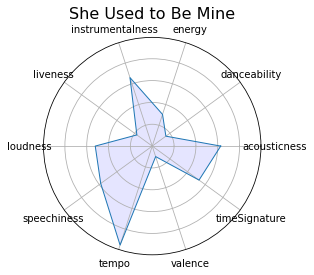

In [7]:
new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = Visualization.Viz()
viz.createSpider(audioFeaturesDF[:], 5, 0, new_ax, 8, True).show()